### Our project focuses on predicting job satisfaction using a deep learning approach. It involves various steps such as feature engineering, correlation analysis, and the use of different modeling techniques, including neural networks. The aim is to explore how well different features correlate with job satisfaction, to optimize the set of features used for training, and to establish whether deep learning performs better compared to classical machine learning methods in this context. ###

In [568]:
import pandas as pd
import numpy as np
np.random.seed(42)



Absolutely, data preprocessing is crucial, especially for creating a generalizable model. Let’s outline the steps we should include beyond missing value handling to ensure data completeness and address inconsistencies.

### **Data Preprocessing Plan**:

1. **Missing Value Handling**: (Already discussed)
   - Impute missing values in numerical and categorical features.
   - Drop columns with a high percentage of missing data.

2. **Data Consistency and Completeness**:
   - **Standardize Categorical Values**: Ensure that all categorical features are standardized (e.g., converting all text to lowercase, handling typos or inconsistencies).
   - **Handle Mixed Formats**: Ensure all numerical values are in the correct format and scale (e.g., years vs. months).
   - **Address Unit Inconsistencies**: For any features that involve units (e.g., salary, years of experience), make sure they are consistent (e.g., all salary figures in the same currency).

3. **Feature Engineering**:
   - **Encoding Categorical Variables**:
     - Use **One-Hot Encoding** for categorical features such as `DeveloperType_Simplified`, `RemoteStatus`, and `Employment_Simplified`.
     - For deep learning, consider using **embedding layers** for high-cardinality features.
   - **Normalization/Standardization**:
     - **Standardize** numerical features (`WorkExp_Log`, `ConvertedCompYearly_Log`, etc.) to bring all features to a similar scale, which helps deep learning models converge faster.
   - **Feature Creation**: Create new features that may capture meaningful interactions (e.g., interaction between experience and employment type).

4. **Outlier Handling**: (Partially discussed)
   - Ensure that extreme values are capped or transformed to reduce their impact on the model.
   - Outliers in `ConvertedCompYearly` and `WorkExp` have already been capped to the **99th percentile**.

5. **Data Splitting**:
   - Ensure the data is split into **train** and **test** sets before imputation and preprocessing to avoid data leakage.



In [569]:
data = pd.read_csv('survey_results_public.csv')

In [570]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define the target variable and features
target_column = 'JobSat'  # Original name before renaming
features = data.drop(columns=[target_column])
target = data[target_column]

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [571]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((52349, 113), (13088, 113), (52349,), (13088,))

In [572]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((52349, 113), (13088, 113), (52349,), (13088,))

In [573]:
# Check the extent of missing values in each column after splitting
missing_values_train = X_train.isnull().sum().sort_values(ascending=False)
missing_values_test = X_test.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values in the training and test sets for better understanding
missing_percentage_train = (X_train.isnull().sum() / len(X_train)) * 100
missing_percentage_test = (X_test.isnull().sum() / len(X_test)) * 100

# Create DataFrames to display missing values summary for training and test sets
missing_summary_train = pd.DataFrame({'Missing Values': missing_values_train, 'Percentage': missing_percentage_train})
missing_summary_test = pd.DataFrame({'Missing Values': missing_values_test, 'Percentage': missing_percentage_test})

# Display the top columns with the most missing values for training and test datasets
print("Missing Values Summary - Training Set:")
print(missing_summary_train[missing_summary_train['Missing Values'] > 0])

print("\nMissing Values Summary - Testing Set:")
print(missing_summary_test[missing_summary_test['Missing Values'] > 0])


Missing Values Summary - Training Set:
                                Missing Values  Percentage
AIAcc                                    22513   43.005597
AIBen                                    22863   43.674187
AIChallenges                             22311   42.619725
AIComplex                                22740   43.439225
AIEthics                                 19046   36.382739
AINextLess integrated                    50458   96.387706
AINextMore integrated                    32820   62.694607
AINextMuch less integrated               51430   98.244475
AINextMuch more integrated               41648   79.558349
AINextNo change                          42378   80.952836
AISearchDevAdmired                       23955   45.760186
AISearchDevHaveWorkedWith                16784   32.061739
AISearchDevWantToWorkWith                23026   43.985558
AISelect                                  3620    6.915127
AISent                                   15578   29.757971
AIThreat         

In [574]:
# Display all rows of the missing values summary by adjusting the Pandas settings
pd.set_option('display.max_rows', None)


# Sort the missing values summary to understand which columns have the most missing data
missing_summary_train_sorted = missing_summary_train.sort_values(by='Percentage', ascending=False)

# Display the complete sorted list of missing value percentages for each column in the training set
print("Complete List of Missing Values Percentage - Training Set:")
print(missing_summary_train_sorted)

Complete List of Missing Values Percentage - Training Set:
                                Missing Values  Percentage
AINextMuch less integrated               51430   98.244475
AINextLess integrated                    50458   96.387706
AINextNo change                          42378   80.952836
AINextMuch more integrated               41648   79.558349
EmbeddedAdmired                          38974   74.450324
EmbeddedWantToWorkWith                   38276   73.116965
EmbeddedHaveWorkedWith                   34581   66.058568
ConvertedCompYearly                      33624   64.230453
AIToolNot interested in Using            32860   62.771018
AINextMore integrated                    32820   62.694607
Knowledge_9                              30267   57.817723
Frequency_3                              30250   57.785249
ProfessionalTech                         30176   57.643890
Knowledge_8                              30172   57.636249
Knowledge_7                              30153   57.5999

In [575]:
# Import necessary libraries
import pandas as pd

# Step 1: Check unique values for each column
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print("\n")



Unique values in 'ResponseId':
[    1     2     3 ... 65435 65436 65437]


Unique values in 'MainBranch':
['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']


Unique values in 'Age':
['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


Unique values in 'Employment':
['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-ti

In [576]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Features for histogram
# numerical_features = ['Age', 'WorkExp', 'JobSat_WorkEnvironment', 'JobSat_ToolsAndResources', 
#                       'JobSat_CompanyCulture', 'JobSat_ProjectSatisfaction', 'JobSat_Teamwork', 
#                       'JobSat_JobRole', 'JobSat_Management', 'JobSat_Compensation', 
#                       'JobSat_WorkLifeBalance', 'ConvertedCompYearly', 'ExperienceRatio']

# # Setting up the grid layout
# num_features = len(numerical_features)
# num_cols = 4
# num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
# fig.tight_layout(pad=5.0)

# # Plotting each histogram in the grid
# for i, feature in enumerate(numerical_features):
#     row, col = divmod(i, num_cols)
#     sns.histplot(data=df, x=feature, bins=30, kde=True, ax=axes[row, col])
#     axes[row, col].set_title(f'Distribution of {feature}')
#     axes[row, col].set_xlabel(feature)
#     axes[row, col].set_ylabel('Frequency')

# # Hide any empty subplots
# for i in range(num_features, num_rows * num_cols):
#     row, col = divmod(i, num_cols)
#     axes[row, col].axis('off')

# plt.show()


In [577]:
def simplify_age(age):
    if pd.isna(age):
        return 21.0  # Midpoint for 'Unknown'
    elif isinstance(age, str):  # Ensure 'age' is a string before checking its value
        if '18-24' in age:
            return 21.0
        elif '25-34' in age:
            return 29.5
        elif '35-44' in age:
            return 39.5
        elif '45-54' in age:
            return 49.5
        elif '55-64' in age:
            return 59.5
        elif '65' in age:
            return 70.0
    return 21.0  # Default to midpoint for 'Unknown' or other unhandled values

# Apply simplifications to X_train and X_test
# Simplify EdLevel
for df in [X_train, X_test]:
    df['EdLevel'] = df['EdLevel'].replace({
        r"Bachelor.*": 'Bachelor’s Degree',
        r"Master.*": 'Master’s Degree',
        r"Professional.*": 'Professional Degree',
        r"Associate.*": 'Associate Degree',
        r"Primary.*": 'Primary School',
        r"Secondary.*": 'Secondary School',
        r"Some.*": 'Some College',
        r".*else": 'Other'
    }, regex=True)

    # Simplify Employment
    df['Employment'] = df['Employment'].str.split(';').str[0]  # Keep only the first category if there are multiple

    # Simplify RemoteWork
    df['RemoteWork'] = df['RemoteWork'].replace({
        r"Hybrid \(some remote, some in-person\)": 'Hybrid'
    }, regex=True)

    # Simplify CodingActivities
    df['CodingActivities'] = df['CodingActivities'].replace({
        r".*Hobby.*": 'Hobby',
        r".*Professional.*": 'Professional Development'
    }, regex=True)

    # Simplify LearnCode and LearnCodeOnline
    df['LearnCode'] = df['LearnCode'].replace({
        r".*online.*|.*videos.*|.*tutorials.*": 'Online Resources',
        r".*books.*|.*media.*": 'Books',
        r".*blogs.*": 'Blogs'
    }, regex=True)

    df['LearnCodeOnline'] = df['LearnCodeOnline'].replace({
        r".*online.*|.*videos.*|.*tutorials.*": 'Online Resources',
        r".*books.*|.*media.*": 'Books',
        r".*blogs.*": 'Blogs'
    }, regex=True)

    # Simplify SurveyEase and SurveyLength
    df['SurveyEase'] = df['SurveyEase'].replace({
        r"Appropriate.*": 'Appropriate',
        r"Easy": 'Easy',
        r".*difficult.*": 'Difficult'
    }, regex=True)

    df['SurveyLength'] = df['SurveyLength'].replace({
        r"Appropriate.*": 'Appropriate',
        r"Too.*": 'Too Long'
    }, regex=True)

    # Simplify Age column using the defined function and convert to numerical
    df['Age'] = df['Age'].apply(lambda x: simplify_age(x))

# Convert appropriate columns to categorical in both X_train and X_test
for df in [X_train, X_test]:
    df['EdLevel'] = df['EdLevel'].astype('category')
    df['Employment'] = df['Employment'].astype('category')
    df['RemoteWork'] = df['RemoteWork'].astype('category')
    df['CodingActivities'] = df['CodingActivities'].astype('category')
    df['LearnCode'] = df['LearnCode'].astype('category')
    df['LearnCodeOnline'] = df['LearnCodeOnline'].astype('category')
    df['SurveyEase'] = df['SurveyEase'].astype('category')
    df['SurveyLength'] = df['SurveyLength'].astype('category')

In [578]:
# # Create a new feature as a ratio of WorkExp to Age
# X_train['ExperienceRatio'] = X_train['WorkExp'] / X_train['Age']
# X_test['ExperienceRatio'] = X_test['WorkExp'] / X_test['Age']


In [579]:
# X_train.ExperienceRatio

In [580]:
X_train.head()

ResponseId                      MainBranch   Age  \
21043       21044  I am a developer by profession  21.0   
48338       48339           I am learning to code  21.0   
40020       40021  I am a developer by profession  21.0   
18367       18368  I am a developer by profession  59.5   
24095       24096  I am a developer by profession  49.5   

                               Employment RemoteWork   Check CodingActivities  \
21043  Not employed, but looking for work        NaN  Apples              NaN   
48338                  Student, full-time        NaN  Apples              NaN   
40020                 Employed, full-time  In-person  Apples            Hobby   
18367                 Employed, full-time     Remote  Apples            Hobby   
24095                 Employed, full-time     Hybrid  Apples            Hobby   

                   EdLevel         LearnCode  \
21043    Bachelor’s Degree  Online Resources   
48338                  NaN               NaN   
40020    Bachelor’s Degree  Online Resources   
18367  Professional Degree  Online Resources   
24095      Master’s Degree  Online Resources   

                                         LearnCodeOnline  ... JobSatPoints_5  \
21043                                   Online Resources  ...            NaN   
48338                                                NaN  ...            NaN   
40020                                   Online Resources  ...            0.0   
18367  Technical documentation;Blogs;Books;Stack Over...  ...           10.0   
24095                                   Online Resources  ...            0.0   

      JobSatPoints_6 JobSatPoints_7 JobSatPoints_8 JobSatPoints_9  \
21043            NaN            NaN            NaN            NaN   
48338            NaN            NaN            NaN            NaN   
40020           20.0           25.0           20.0           25.0   
18367           25.0           15.0           30.0            0.0   
24095            0.0           50.0           50.0            0.0   

      JobSatPoints_10 JobSatPoints_11 SurveyLength SurveyEase  \
21043             NaN             NaN  Appropriate  Difficult   
48338             NaN             NaN          NaN        NaN   
40020            10.0             0.0  Appropriate       Easy   
18367            10.0             0.0  Appropriate       Easy   
24095             0.0             0.0  Appropriate       Easy   

      ConvertedCompYearly  
21043                 NaN  
48338                 NaN  
40020             61789.0  
18367             63694.0  
24095             42962.0  

[5 rows x 113 columns]

In [581]:
# Identify columns with missing values between 40% and 80%
columns_40_80_missing = missing_summary_train[
    (missing_summary_train['Percentage'] > 40) & (missing_summary_train['Percentage'] <= 80)
].index

# Extract the columns with 40-80% missing values from the training dataset
X_train_40_80 = X_train[columns_40_80_missing]

# Filter only numerical columns for correlation analysis
numerical_columns_40_80 = X_train_40_80.select_dtypes(include=['int64', 'float64']).columns

# Combine these numerical columns with the target variable for correlation analysis
data_for_correlation = pd.concat([X_train_40_80[numerical_columns_40_80], y_train], axis=1)

# Calculate the correlation of features with 'Job Satisfaction' (target variable)
correlation_matrix = data_for_correlation.corr()

# Extract the correlation values for 'JobSat' column and sort by absolute value to see the importance
correlation_with_target = correlation_matrix['JobSat'].sort_values(key=abs, ascending=False)

# Display the correlation values for features with 'JobSat' to determine their importance
print("Correlation with Job Satisfaction for Features with 40-80% Missing Values:")
correlation_with_target


Correlation with Job Satisfaction for Features with 40-80% Missing Values:


JobSat                 1.000000
WorkExp                0.097421
JobSatPoints_1         0.095082
JobSatPoints_8         0.056756
JobSatPoints_10        0.048287
JobSatPoints_6         0.047980
JobSatPoints_5         0.047963
ConvertedCompYearly    0.045765
JobSatPoints_11        0.044905
JobSatPoints_9         0.040323
JobSatPoints_7         0.037790
JobSatPoints_4         0.030992
CompTotal             -0.010429
Name: JobSat, dtype: float64

In [582]:
# Rename columns in X_train and X_test
X_train.rename(columns={
    'JobSatPoints_1': 'JobSat_WorkEnvironment',
    'JobSatPoints_4': 'JobSat_ToolsAndResources',
    'JobSatPoints_5': 'JobSat_CompanyCulture',
    'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
    'JobSatPoints_7': 'JobSat_Teamwork',
    'JobSatPoints_8': 'JobSat_JobRole',
    'JobSatPoints_9': 'JobSat_Management',
    'JobSatPoints_10': 'JobSat_Compensation',
    'JobSatPoints_11': 'JobSat_WorkLifeBalance'
}, inplace=True)

X_test.rename(columns={
    'JobSatPoints_1': 'JobSat_WorkEnvironment',
    'JobSatPoints_4': 'JobSat_ToolsAndResources',
    'JobSatPoints_5': 'JobSat_CompanyCulture',
    'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
    'JobSatPoints_7': 'JobSat_Teamwork',
    'JobSatPoints_8': 'JobSat_JobRole',
    'JobSatPoints_9': 'JobSat_Management',
    'JobSatPoints_10': 'JobSat_Compensation',
    'JobSatPoints_11': 'JobSat_WorkLifeBalance'
}, inplace=True)


In [583]:
X_train.head()

ResponseId                      MainBranch   Age  \
21043       21044  I am a developer by profession  21.0   
48338       48339           I am learning to code  21.0   
40020       40021  I am a developer by profession  21.0   
18367       18368  I am a developer by profession  59.5   
24095       24096  I am a developer by profession  49.5   

                               Employment RemoteWork   Check CodingActivities  \
21043  Not employed, but looking for work        NaN  Apples              NaN   
48338                  Student, full-time        NaN  Apples              NaN   
40020                 Employed, full-time  In-person  Apples            Hobby   
18367                 Employed, full-time     Remote  Apples            Hobby   
24095                 Employed, full-time     Hybrid  Apples            Hobby   

                   EdLevel         LearnCode  \
21043    Bachelor’s Degree  Online Resources   
48338                  NaN               NaN   
40020    Bachelor’s Degree  Online Resources   
18367  Professional Degree  Online Resources   
24095      Master’s Degree  Online Resources   

                                         LearnCodeOnline  ...  \
21043                                   Online Resources  ...   
48338                                                NaN  ...   
40020                                   Online Resources  ...   
18367  Technical documentation;Blogs;Books;Stack Over...  ...   
24095                                   Online Resources  ...   

      JobSat_CompanyCulture JobSat_ProjectSatisfaction JobSat_Teamwork  \
21043                   NaN                        NaN             NaN   
48338                   NaN                        NaN             NaN   
40020                   0.0                       20.0            25.0   
18367                  10.0                       25.0            15.0   
24095                   0.0                        0.0            50.0   

      JobSat_JobRole JobSat_Management JobSat_Compensation  \
21043            NaN               NaN                 NaN   
48338            NaN               NaN                 NaN   
40020           20.0              25.0                10.0   
18367           30.0               0.0                10.0   
24095           50.0               0.0                 0.0   

      JobSat_WorkLifeBalance SurveyLength SurveyEase ConvertedCompYearly  
21043                    NaN  Appropriate  Difficult                 NaN  
48338                    NaN          NaN        NaN                 NaN  
40020                    0.0  Appropriate       Easy             61789.0  
18367                    0.0  Appropriate       Easy             63694.0  
24095                    0.0  Appropriate       Easy             42962.0  

[5 rows x 113 columns]


### **Analysis of Correlation Values**:
- Features like **`WorkExp`**, **`JobSatPoints_1`**, and **`JobSatPoints_8`** have the **highest positive correlation** with job satisfaction (though still relatively low, around 0.1).
- **`ConvertedCompYearly`** and **`CompTotal`** have very low correlations, suggesting that they may not be as impactful for predicting job satisfaction.
- The correlations are all **below 0.1**, indicating that none of these features have a very strong relationship with `Job Satisfaction`.



1. **Keep Features with Some Correlation**:
   - **`WorkExp`** and **`JobSatPoints_1` to `JobSatPoints_8`** have some correlation, though it's not particularly strong. These features could still be useful for building a model, especially considering interactions with other features.
   - **Imputation**: Use **KNN imputation** or **median imputation** for missing values in these features to preserve their relationships.

2. **Drop Features with Very Low Correlation**:
   - **`CompTotal`** has a very low correlation with `Job Satisfaction`. It may not add significant predictive power to the model and can be dropped to simplify the dataset.
   - **`ConvertedCompYearly`** has a low correlation, but it might still be contextually significant for salary analysis. Consider **retaining** if salary is an important dimension for understanding satisfaction, otherwise, **drop it**.

3. **Imputation Strategy**:
   - **KNN Imputation**:
     - Use KNN imputation for features that show moderate importance (e.g., `WorkExp` and job satisfaction point-related features).
   - **Median/Mode Imputation**:
     - Use median imputation for numerical features that are retained and have some missing values.
   - **Create Indicator Flags**:
     - For features that were imputed, create **indicator flags** to mark which values were missing.

- **Drop the features** that have very low or no correlation (`CompTotal`, possibly `ConvertedCompYearly`).
- **Impute missing values** for the rest using KNN for the moderately correlated features and median/mode imputation for others.
- **Create binary flags** for features with significant missing values to track imputation.


In [584]:
# # Box Plot for Job Satisfaction by Job Role
# plt.figure(figsize=(15, 7))
# sns.boxplot(x='JobSat_JobRole', y='ConvertedCompYearly', data=df)
# plt.xticks(rotation=90)
# plt.title('Job Satisfaction by Job Role')
# plt.xlabel('Job Role')
# plt.ylabel('Job Satisfaction')
# plt.show()


In [585]:
# # Correlation Heatmap
# plt.figure(figsize=(20, 15))
# sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap for Numerical Features')
# plt.show()


In [586]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Step 1: Drop Features with Low Correlation
features_to_drop = ['CompTotal', 'ResponseId']
X_train_cleaned = X_train.drop(columns=features_to_drop)
X_test_cleaned = X_test.drop(columns=features_to_drop)

# Step 2: Impute Missing Values
# Identify numerical and categorical features
numerical_features = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_cleaned.select_dtypes(include=['object']).columns

# Step 2.1: Find Optimal K for KNN Imputation
# Remove rows with NaN in the target variable for both training and test sets
non_null_train_indices = y_train.notna()
X_train_cleaned = X_train_cleaned[non_null_train_indices]
y_train = y_train[non_null_train_indices]

non_null_test_indices = y_test.notna()
X_test_cleaned = X_test_cleaned[non_null_test_indices]
y_test = y_test[non_null_test_indices]

# Split a subset of training data for finding optimal k
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_cleaned, y_train, test_size=0.2, random_state=42)

k_values = [2,3,4,5,6,7,8,9,10]
scores = []

for k in k_values:
    knn_imputer = KNNImputer(n_neighbors=k)
    X_train_imputed = knn_imputer.fit_transform(X_train_split[numerical_features])
    X_val_imputed = knn_imputer.transform(X_val_split[numerical_features])

    # Create DataFrames from the imputed numerical features
    X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=numerical_features, index=X_train_split.index)
    X_val_imputed_df = pd.DataFrame(X_val_imputed, columns=numerical_features, index=X_val_split.index)

    # Concatenate categorical features back to the imputed numerical DataFrame
    X_train_imputed_df = pd.concat([X_train_imputed_df, X_train_split[categorical_features]], axis=1)
    X_val_imputed_df = pd.concat([X_val_imputed_df, X_val_split[categorical_features]], axis=1)

    # Train a model (e.g., linear regression) to evaluate the imputation
    model = LinearRegression()
    model.fit(X_train_imputed_df[numerical_features], y_train_split)
    score = cross_val_score(model, X_val_imputed_df[numerical_features], y_val_split, cv=5, scoring='r2').mean()
    scores.append((k, score))

# Find the optimal k value
best_k = max(scores, key=lambda item: item[1])[0]
print(f"Optimal value for k: {best_k}")

# Step 2.2: KNN Imputation with Optimal k
knn_imputer = KNNImputer(n_neighbors=best_k)
X_train_cleaned[numerical_features] = knn_imputer.fit_transform(X_train_cleaned[numerical_features])
X_test_cleaned[numerical_features] = knn_imputer.transform(X_test_cleaned[numerical_features])

# Convert appropriate columns to categorical in both X_train_cleaned and X_test_cleaned
for df in [X_train_cleaned, X_test_cleaned]:
    df['EdLevel'] = df['EdLevel'].astype('category')
    df['Employment'] = df['Employment'].astype('category')
    df['RemoteWork'] = df['RemoteWork'].astype('category')
    df['CodingActivities'] = df['CodingActivities'].astype('category')
    df['LearnCode'] = df['LearnCode'].astype('category')
    df['LearnCodeOnline'] = df['LearnCodeOnline'].astype('category')
    df['SurveyEase'] = df['SurveyEase'].astype('category')
    df['SurveyLength'] = df['SurveyLength'].astype('category')

# Display the updated DataFrame for X_train_cleaned
X_train_cleaned.head()


Optimal value for k: 2


MainBranch   Age  \
40020                     I am a developer by profession  21.0   
18367                     I am a developer by profession  59.5   
24095                     I am a developer by profession  49.5   
682                       I am a developer by profession  49.5   
9767   I am not primarily a developer, but I write co...  49.5   

                Employment RemoteWork   Check CodingActivities  \
40020  Employed, full-time  In-person  Apples            Hobby   
18367  Employed, full-time     Remote  Apples            Hobby   
24095  Employed, full-time     Hybrid  Apples            Hobby   
682    Employed, full-time     Remote  Apples            Hobby   
9767   Employed, full-time     Remote  Apples            Hobby   

                   EdLevel         LearnCode  \
40020    Bachelor’s Degree  Online Resources   
18367  Professional Degree  Online Resources   
24095      Master’s Degree  Online Resources   
682        Master’s Degree  Online Resources   
9767       Master’s Degree  Online Resources   

                                         LearnCodeOnline  \
40020                                   Online Resources   
18367  Technical documentation;Blogs;Books;Stack Over...   
24095                                   Online Resources   
682    Technical documentation;Blogs;Written Tutorial...   
9767                                    Online Resources   

                                                 TechDoc  ...  \
40020                                                NaN  ...   
18367  API document(s) and/or SDK document(s);First-p...  ...   
24095                                                NaN  ...   
682    API document(s) and/or SDK document(s);First-p...  ...   
9767   API document(s) and/or SDK document(s);User gu...  ...   

      JobSat_CompanyCulture JobSat_ProjectSatisfaction JobSat_Teamwork  \
40020                   0.0                       20.0            25.0   
18367                  10.0                       25.0            15.0   
24095                   0.0                        0.0            50.0   
682                     0.0                        0.0             0.0   
9767                    0.0                       10.0            25.0   

      JobSat_JobRole JobSat_Management JobSat_Compensation  \
40020           20.0              25.0                10.0   
18367           30.0               0.0                10.0   
24095           50.0               0.0                 0.0   
682              0.0               0.0                 0.0   
9767            30.0              25.0                 0.0   

      JobSat_WorkLifeBalance SurveyLength SurveyEase ConvertedCompYearly  
40020                    0.0  Appropriate       Easy             61789.0  
18367                    0.0  Appropriate       Easy             63694.0  
24095                    0.0  Appropriate       Easy             42962.0  
682                      0.0  Appropriate       Easy             56022.0  
9767                     0.0     Too Long  Difficult            125000.0  

[5 rows x 111 columns]

In [587]:
# # Rename columns in X_train and X_test
# X_train.rename(columns={
#     'JobSatPoints_1': 'JobSat_WorkEnvironment',
#     'JobSatPoints_4': 'JobSat_ToolsAndResources',
#     'JobSatPoints_5': 'JobSat_CompanyCulture',
#     'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
#     'JobSatPoints_7': 'JobSat_Teamwork',
#     'JobSatPoints_8': 'JobSat_JobRole',
#     'JobSatPoints_9': 'JobSat_Management',
#     'JobSatPoints_10': 'JobSat_Compensation',
#     'JobSatPoints_11': 'JobSat_WorkLifeBalance'
# }, inplace=True)

# X_test.rename(columns={
#     'JobSatPoints_1': 'JobSat_WorkEnvironment',
#     'JobSatPoints_4': 'JobSat_ToolsAndResources',
#     'JobSatPoints_5': 'JobSat_CompanyCulture',
#     'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
#     'JobSatPoints_7': 'JobSat_Teamwork',
#     'JobSatPoints_8': 'JobSat_JobRole',
#     'JobSatPoints_9': 'JobSat_Management',
#     'JobSatPoints_10': 'JobSat_Compensation',
#     'JobSatPoints_11': 'JobSat_WorkLifeBalance'
# }, inplace=True)


In [588]:
# Step 2.2: Check Missing Value Percentages After KNN Imputation
missing_values_train = X_train_cleaned.isnull().sum().sort_values(ascending=False)
missing_percentage_train = (X_train_cleaned.isnull().sum() / len(X_train_cleaned)) * 100
missing_summary_train = pd.DataFrame({'Missing Values': missing_values_train, 'Percentage': missing_percentage_train})

missing_values_test = X_test_cleaned.isnull().sum().sort_values(ascending=False)
missing_percentage_test = (X_test_cleaned.isnull().sum() / len(X_test_cleaned)) * 100
missing_summary_test = pd.DataFrame({'Missing Values': missing_values_test, 'Percentage': missing_percentage_test})

# Display missing value summaries
print("Missing Values Summary - Training Set:")
print(missing_summary_train[missing_summary_train['Missing Values'] > 0])

print("\nMissing Values Summary - Testing Set:")
print(missing_summary_test[missing_summary_test['Missing Values'] > 0])

# Continue with Median and Mode Imputation for Remaining Features if needed


Missing Values Summary - Training Set:
                                Missing Values  Percentage
AIAcc                                     8763   37.656310
AIBen                                     8942   38.425508
AIChallenges                              7163   30.780800
AIComplex                                 8827   37.931331
AIEthics                                  6259   26.896137
AINextLess integrated                    22424   96.360277
AINextMore integrated                    13221   56.813201
AINextMuch less integrated               22864   98.251042
AINextMuch more integrated               17894   76.893988
AINextNo change                          18208   78.243307
AISearchDevAdmired                        8538   36.689442
AISearchDevHaveWorkedWith                 5185   22.280951
AISearchDevWantToWorkWith                 8075   34.699841
AISent                                    5415   23.269305
AIThreat                                  5417   23.277900
AIToolCurrently U

In [589]:
# Step 1: Drop Features with Excessive Missing Values (above 80%)
threshold = 80
features_to_drop_due_to_missingness = missing_summary_train[missing_summary_train['Percentage'] > threshold].index.tolist()
# X_train_cleaned.drop(columns=features_to_drop_due_to_missingness, inplace=True)
# X_test_cleaned.drop(columns=features_to_drop_due_to_missingness, inplace=True)


X_train_cleaned.drop(columns=[col for col in features_to_drop_due_to_missingness if col in X_train_cleaned.columns], inplace=True)
X_test_cleaned.drop(columns=[col for col in features_to_drop_due_to_missingness if col in X_test_cleaned.columns], inplace=True)



In [590]:
# Step 1: Re-identify Numerical and Categorical Features After Cleaning
categorical_features = X_train_cleaned.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: Index(['MainBranch', 'Employment', 'RemoteWork', 'Check', 'CodingActivities',
       'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'BuildvsBuy', 'TechEndorse', 'Country', 'Currency',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired',
       'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired',
       'OpSysPersonal use', 'OpSysP

In [591]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Frequency encoding function
def frequency_encoding(df, feature):
    freq_map = df[feature].value_counts(normalize=True).to_dict()  # Get the frequency of each category
    df[feature] = df[feature].map(freq_map)  # Map the frequency to the original feature
    return df

# Re-identify low and high cardinality categorical features
available_categorical_features = [col for col in categorical_features if col in X_train_cleaned.columns]

# Separate low and high cardinality categorical features
low_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() < 10]
high_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() >= 10]

# Apply frequency encoding to high-cardinality features in both train and test datasets
for feature in high_cardinality_features:
    X_train_cleaned = frequency_encoding(X_train_cleaned, feature)
    X_test_cleaned = frequency_encoding(X_test_cleaned, feature)

# Reinitialize the pipeline for encoding and scaling (using 'sparse_output' instead of 'sparse')
column_transformer = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), low_cardinality_features)  # Only low-cardinality features are one-hot encoded
    ]
)

# Include scaling in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler(with_mean=False))
])

# Fit the pipeline on training data and transform both train and test sets
X_train_transformed = pipeline.fit_transform(X_train_cleaned)
X_test_transformed = pipeline.transform(X_test_cleaned)

# Get column names after transformation
numeric_feature_names = numerical_features.tolist()
onehot_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(low_cardinality_features).tolist()

# Combine column names
all_feature_names = numeric_feature_names + onehot_feature_names

# Create DataFrames from transformed data with proper column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, index=X_train_cleaned.index, columns=all_feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, index=X_test_cleaned.index, columns=all_feature_names)

# Display the transformed training dataset
print(X_train_transformed_df.head())


            Age   WorkExp  JobSat_WorkEnvironment  JobSat_ToolsAndResources  \
40020  2.160628  0.108474                0.000000                  0.000000   
18367  6.121778  3.796598                0.384204                  0.000000   
24095  5.092908  2.711856                0.000000                  0.000000   
682    5.092908  2.603381                0.000000                  0.000000   
9767   5.092908  1.952536                0.000000                  0.538884   

       JobSat_CompanyCulture  JobSat_ProjectSatisfaction  JobSat_Teamwork  \
40020                0.00000                    0.738114         0.922731   
18367                0.45818                    0.922642         0.553639   
24095                0.00000                    0.000000         1.845462   
682                  0.00000                    0.000000         0.000000   
9767                 0.00000                    0.369057         0.922731   

       JobSat_JobRole  JobSat_Management  JobSat_Compensation 

In [592]:
# #### ADD SPARSE CONVERSION HERE ####
# Convert the DataFrame to a sparse DataFrame
X_train_sparse = X_train_transformed_df.astype(pd.SparseDtype("float", 0))
X_test_sparse = X_test_transformed_df.astype(pd.SparseDtype("float", 0))

# Check memory usage to verify sparsity
print(X_train_sparse.memory_usage(deep=True))

# Proceed with model training using the sparse DataFrames (X_train_sparse and X_test_sparse)

Index                                                                                                                                  186168
Age                                                                                                                                    279252
WorkExp                                                                                                                                277584
JobSat_WorkEnvironment                                                                                                                 173940
JobSat_ToolsAndResources                                                                                                                91464
JobSat_CompanyCulture                                                                                                                  111588
JobSat_ProjectSatisfaction                                                                                                             207084
JobSat

### Applying the frequency encoding function to all high-cardinality features. This maps each categorical value in a feature to its relative frequency in the dataset. ###
### OneHotEncoder for Low-Cardinality: Low-cardinality features are one-hot encoded using the OneHotEncoder. ###
### Integration in Pipeline: After frequency encoding, the pipeline applies one-hot encoding to low-cardinality features and standardizes the numerical features.  ###

In [593]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Step 2.3: Median Imputation for Remaining Numerical Features
# # important_numerical_features = ['WorkExp', 'JobSat_WorkEnvironment', 'JobSat_JobRole', 'JobSat_Compensation', 
# #                                 'JobSat_ProjectSatisfaction', 'JobSat_CompanyCulture', 'JobSat_WorkLifeBalance', 
# #                                 'JobSat_Management', 'JobSat_Teamwork', 'JobSat_ToolsAndResources']

# important_numerical_features = ['Age', 'WorkExp', 'JobSat_WorkEnvironment', 'JobSat_ToolsAndResources',
#        'JobSat_CompanyCulture', 'JobSat_ProjectSatisfaction',
#        'JobSat_Teamwork', 'JobSat_JobRole', 'JobSat_Management',
#        'JobSat_Compensation', 'JobSat_WorkLifeBalance', 'ConvertedCompYearly']



# for feature in numerical_features:
#     if feature not in important_numerical_features:
#         median_value = X_train_cleaned[feature].median()
#         X_train_cleaned[feature] = X_train_cleaned[feature].fillna(median_value)
#         X_test_cleaned[feature] = X_test_cleaned[feature].fillna(median_value)

# # Step 2.4: Mode Imputation for Categorical Features
# for feature in categorical_features:
#     if feature in X_train_cleaned.columns:  # Ensure feature exists in cleaned dataset
#         mode_value = X_train_cleaned[feature].mode()[0]
#         X_train_cleaned[feature] = X_train_cleaned[feature].fillna(mode_value)
#         X_test_cleaned[feature] = X_test_cleaned[feature].fillna(mode_value)

# # Concatenate the missing flags to the cleaned DataFrame
# X_train_cleaned = pd.concat([X_train_cleaned], axis=1)
# X_test_cleaned = pd.concat([X_test_cleaned], axis=1)

# # Step 3: Encoding and Scaling
# # Check for any missing columns in X_train_cleaned before separating low and high cardinality categorical features
# available_categorical_features = [col for col in categorical_features if col in X_train_cleaned.columns]

# # Separate low and high cardinality categorical features
# low_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() < 10]
# high_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() >= 10]

# # Apply OneHotEncoder only to low-cardinality features
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', numerical_features),
#         ('cat', OneHotEncoder(drop='first', sparse_output=False), low_cardinality_features)
#     ]
# )

# # Include scaling in the pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', column_transformer),
#     ('scaler', StandardScaler(with_mean=False))
# ])

# # Fit the pipeline on training data and transform both train and test sets
# X_train_transformed = pipeline.fit_transform(X_train_cleaned)
# X_test_transformed = pipeline.transform(X_test_cleaned)

# # Get column names after transformation
# numeric_feature_names = numerical_features.tolist()
# onehot_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(low_cardinality_features).tolist()

# # Combine column names
# all_feature_names = numeric_feature_names + onehot_feature_names

# # Create DataFrames from transformed data with proper column names
# X_train_transformed_df = pd.DataFrame(X_train_transformed, index=X_train_cleaned.index, columns=all_feature_names)
# X_test_transformed_df = pd.DataFrame(X_test_transformed, index=X_test_cleaned.index, columns=all_feature_names)


In [594]:
X_train_transformed_df.head()

Age   WorkExp  JobSat_WorkEnvironment  JobSat_ToolsAndResources  \
40020  2.160628  0.108474                0.000000                  0.000000   
18367  6.121778  3.796598                0.384204                  0.000000   
24095  5.092908  2.711856                0.000000                  0.000000   
682    5.092908  2.603381                0.000000                  0.000000   
9767   5.092908  1.952536                0.000000                  0.538884   

       JobSat_CompanyCulture  JobSat_ProjectSatisfaction  JobSat_Teamwork  \
40020                0.00000                    0.738114         0.922731   
18367                0.45818                    0.922642         0.553639   
24095                0.00000                    0.000000         1.845462   
682                  0.00000                    0.000000         0.000000   
9767                 0.00000                    0.369057         0.922731   

       JobSat_JobRole  JobSat_Management  JobSat_Compensation  ...  \
40020        0.763639           1.000327             0.435514  ...   
18367        1.145458           0.000000             0.435514  ...   
24095        1.909096           0.000000             0.000000  ...   
682          0.000000           0.000000             0.000000  ...   
9767         1.145458           1.000327             0.000000  ...   

       ProfessionalQuestion_Internal Developer portal  \
40020                                             0.0   
18367                                             0.0   
24095                                             0.0   
682                                               0.0   
9767                                              0.0   

       ProfessionalQuestion_Microsoft Teams search  \
40020                                          0.0   
18367                                          0.0   
24095                                          0.0   
682                                            0.0   
9767                                           0.0   

       ProfessionalQuestion_Other:  ProfessionalQuestion_Slack search  \
40020                          0.0                                0.0   
18367                          0.0                                0.0   
24095                          0.0                                0.0   
682                            0.0                                0.0   
9767                           0.0                                0.0   

       ProfessionalQuestion_Traditional public search engine  \
40020                                           2.007631       
18367                                           2.007631       
24095                                           2.007631       
682                                             2.007631       
9767                                            2.007631       

       ProfessionalQuestion_nan  SurveyLength_Too Long  SurveyLength_nan  \
40020                       0.0               0.000000               0.0   
18367                       0.0               0.000000               0.0   
24095                       0.0               0.000000               0.0   
682                         0.0               0.000000               0.0   
9767                        0.0               2.125886               0.0   

       SurveyEase_Easy  SurveyEase_nan  
40020         2.002161             0.0  
18367         2.002161             0.0  
24095         2.002161             0.0  
682           2.002161             0.0  
9767          0.000000             0.0  

[5 rows x 166 columns]

In [595]:
import numpy as np

# Calculate total number of elements
total_elements = X_train_transformed_df.size

# Calculate number of zero elements
zero_elements = (X_train_transformed_df == 0).sum().sum()

# Calculate the sparsity percentage
sparsity = (zero_elements / total_elements) * 100

print(f"Sparsity of the dataset: {sparsity:.2f}%")


Sparsity of the dataset: 82.43%


In [596]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import pandas as pd

# # Step 1: Standardize the data - You have already done this in your pipeline
# # Assuming X_train_transformed_df and X_test_transformed_df are already standardized

# # Step 2: Apply PCA
# # We will first determine the optimal number of components that explain most of the variance
# pca = PCA()
# pca.fit(X_train_transformed_df)

# # Calculate the cumulative explained variance ratio
# explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# # Plot the explained variance
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance vs. Number of Principal Components')
# plt.grid(True)
# plt.show()

# # Step 3: Choose the number of components that explain a significant amount of variance (e.g., 95%)
# # Let's say we want to keep at least 95% of the variance
# n_components = next(x for x, val in enumerate(explained_variance_ratio_cumulative) if val >= 0.95) + 1

# print(f"Number of components to retain 95% variance: {n_components}")

# # Step 4: Apply PCA to the dataset with the chosen number of components
# pca = PCA(n_components=n_components)
# X_train_pca = pca.fit_transform(X_train_transformed_df)
# X_test_pca = pca.transform(X_test_transformed_df)

# # Convert the PCA result into a DataFrame (optional)
# pca_columns = [f'PC{i+1}' for i in range(n_components)]
# X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns, index=X_train_transformed_df.index)
# X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns, index=X_test_transformed_df.index)

# # Display some information for verification
# print("PCA-transformed Training Data Overview:")
# print(X_train_pca_df.head())

# print("\nPCA-transformed Testing Data Overview:")
# print(X_test_pca_df.head())

# # You can save the PCA-transformed data to CSV files if needed
# X_train_pca_df.to_csv('X_train_pca.csv', index=False)
# X_test_pca_df.to_csv('X_test_pca.csv', index=False)


In [597]:
# # Save the transformed training and testing datasets to CSV files
# X_train_transformed_df.to_csv('X_train_transformed.csv', index=False)
# X_test_transformed_df.to_csv('X_test_transformed.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# print("Data saved successfully to CSV files.")


In [598]:
# # Display the cleaned and imputed datasets for verification
# print("Transformed Training Data Overview:")
# X_train_transformed_df.head()

# # print("\nTransformed Testing Data Overview:")
# # X_test_transformed_df.head()


In [599]:
X_train_transformed_df.columns.tolist()

['Age',
 'WorkExp',
 'JobSat_WorkEnvironment',
 'JobSat_ToolsAndResources',
 'JobSat_CompanyCulture',
 'JobSat_ProjectSatisfaction',
 'JobSat_Teamwork',
 'JobSat_JobRole',
 'JobSat_Management',
 'JobSat_Compensation',
 'JobSat_WorkLifeBalance',
 'ConvertedCompYearly',
 'MainBranch_I am learning to code',
 'MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies',
 'MainBranch_I code primarily as a hobby',
 'MainBranch_I used to be a developer by profession, but no longer am',
 'Employment_Employed, part-time',
 'Employment_Independent contractor, freelancer, or self-employed',
 'Employment_Not employed, and not looking for work',
 'Employment_Not employed, but looking for work',
 'Employment_Student, full-time',
 'Employment_Student, part-time',
 'RemoteWork_In-person',
 'RemoteWork_Remote',
 'RemoteWork_nan',
 'EdLevel_Bachelor’s Degree',
 'EdLevel_Master’s Degree',
 'EdLevel_Primary School',
 'EdLevel_Professional Degree',
 'EdLevel_Secondary 

In [600]:
# Check missing values in training data
missing_values_train = X_train_transformed_df.isnull().sum()
print("Missing Values in Training Data:")
print(missing_values_train[missing_values_train > 0])

# Check missing values in test data
missing_values_test = X_test_transformed_df.isnull().sum()
print("\nMissing Values in Testing Data:")
print(missing_values_test[missing_values_test > 0])


Missing Values in Training Data:
Series([], dtype: int64)

Missing Values in Testing Data:
Series([], dtype: int64)


In [601]:
# Check if there are any missing values in the training and test sets
any_missing_train = X_train_transformed_df.isnull().values.any()
any_missing_test = X_test_transformed_df.isnull().values.any()

print(f"\nAre there any missing values in the training set? {any_missing_train}")
print(f"Are there any missing values in the test set? {any_missing_test}")



Are there any missing values in the training set? False
Are there any missing values in the test set? False


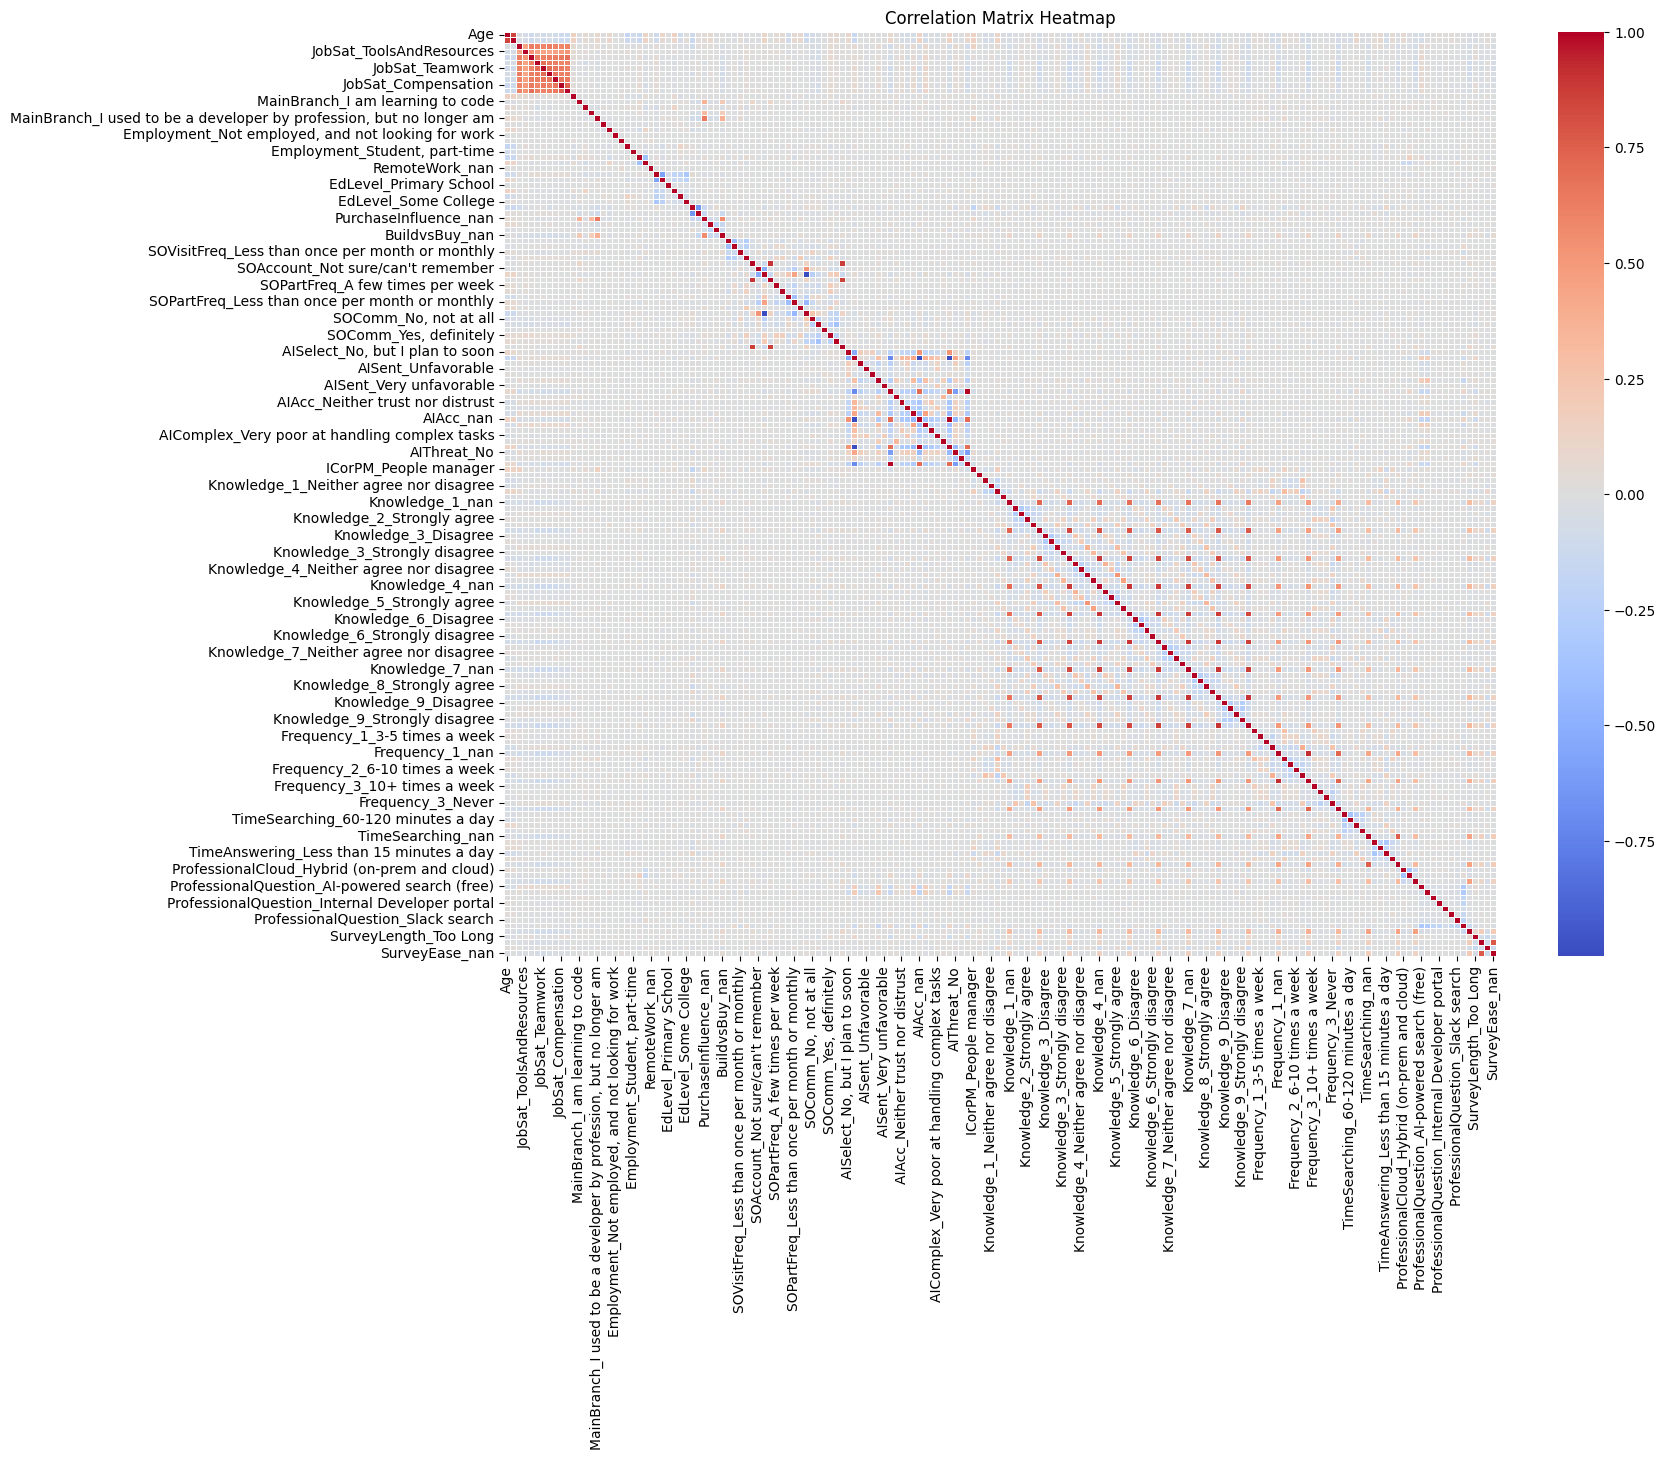

In [602]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Calculate the correlation matrix
# correlation_matrix = X_train_transformed_df.corr()
# print("Correlation Matrix:")
# print(correlation_matrix)
correlation_matrix = X_train_transformed_df.corr()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv', index=True)
# Step 1: Calculate correlation matrix
# correlation_matrix = X_train_transformed_df.corr()

# Step 2: Plot heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [603]:
# correlation_matrix

In [604]:
# # Find highly correlated features
# threshold = 0.8  # You can adjust this threshold
# highly_correlated_pairs = []

# for i in range(correlation_matrix.shape[0]):
#     for j in range(i+1, correlation_matrix.shape[1]):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             highly_correlated_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# # Display highly correlated pairs
# for feature1, feature2, correlation in highly_correlated_pairs:
#     print(f"{feature1} and {feature2} have a correlation of {correlation:.2f}")


In [605]:
# highly_correlated_pairs

In [606]:
import pandas as pd
import numpy as np

# Step 1: Calculate the correlation matrix of features
correlation_matrix = X_train_transformed_df.corr().abs()

# Step 2: Identify the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Step 3: Find features with high correlation among features
high_correlation_threshold = 0.8
features_to_drop_high_corr = [column for column in upper_triangle.columns if any(upper_triangle[column] > high_correlation_threshold)]

# Since 'Age' and 'WorkExp' have high correlation, decide which one to remove (example logic)
if 'Age' in features_to_drop_high_corr and 'WorkExp' not in features_to_drop_high_corr:
    features_to_drop_high_corr.remove('Age')
elif 'WorkExp' in features_to_drop_high_corr and 'Age' not in features_to_drop_high_corr:
    features_to_drop_high_corr.remove('WorkExp')

# Step 4: Find features with low correlation with the target
target_corr_threshold = 0.1
# Calculate correlation between each feature and the target variable (`y_train`)
target_corr = X_train_transformed_df.join(y_train.rename('JobSat')).corr()['JobSat'].abs()

# Get features with correlation below the threshold with target
low_corr_features = target_corr[target_corr < target_corr_threshold].index.tolist()

# Remove 'JobSat' from low_corr_features if it's included
if 'JobSat' in low_corr_features:
    low_corr_features.remove('JobSat')

# Step 5: Combine features to drop (either highly correlated with other features or with low correlation with target)
features_to_drop = list(set(features_to_drop_high_corr + low_corr_features))

# Step 6: Drop selected features from train and test sets
X_train_transformed_df = X_train_transformed_df.drop(columns=features_to_drop)
X_test_transformed_df = X_test_transformed_df.drop(columns=features_to_drop)

print(f"Features removed due to high or low correlation: {features_to_drop}")


Features removed due to high or low correlation: ['Knowledge_8_Neither agree nor disagree', 'Knowledge_7_Neither agree nor disagree', 'TimeAnswering_Over 120 minutes a day', 'Knowledge_9_Disagree', 'AIThreat_Yes', 'Knowledge_1_Neither agree nor disagree', 'Knowledge_1_Disagree', 'Knowledge_4_Neither agree nor disagree', 'Knowledge_3_Neither agree nor disagree', 'TimeSearching_30-60 minutes a day', 'SOPartFreq_Multiple times per day', 'JobSat_ProjectSatisfaction', 'Employment_Employed, part-time', 'MainBranch_I used to be a developer by profession, but no longer am', 'PurchaseInfluence_I have some influence', 'SOPartFreq_Daily or almost daily', 'AISent_Indifferent', 'AIThreat_No', 'EdLevel_Professional Degree', 'AISelect_Yes', 'Frequency_1_3-5 times a week', 'SOVisitFreq_Less than once per month or monthly', 'SOComm_Yes, definitely', 'JobSat_CompanyCulture', 'BuildvsBuy_Out-of-the-box is ready to go with little need for customization', 'Frequency_1_10+ times a week', 'Knowledge_6_Strong

In [607]:
X_train_transformed_df.head()

PurchaseInfluence_I have little or no influence  \
40020                                         2.071196   
18367                                         0.000000   
24095                                         0.000000   
682                                           0.000000   
9767                                          2.071196   

       Knowledge_1_Strongly agree  Knowledge_2_Disagree  \
40020                         0.0              2.488289   
18367                         0.0              2.488289   
24095                         0.0              0.000000   
682                           0.0              0.000000   
9767                          0.0              0.000000   

       Knowledge_2_Strongly agree  Knowledge_2_Strongly disagree  \
40020                         0.0                            0.0   
18367                         0.0                            0.0   
24095                         0.0                            0.0   
682                           0.0                            0.0   
9767                          0.0                            0.0   

       Knowledge_3_Disagree  Knowledge_3_Strongly agree  \
40020              0.000000                     0.00000   
18367              2.558294                     0.00000   
24095              0.000000                     3.44186   
682                2.558294                     0.00000   
9767               0.000000                     0.00000   

       Knowledge_3_Strongly disagree  Knowledge_4_Disagree  \
40020                            0.0              0.000000   
18367                            0.0              0.000000   
24095                            0.0              0.000000   
682                              0.0              0.000000   
9767                             0.0              2.857175   

       Knowledge_4_Strongly agree  ...  Knowledge_5_Strongly disagree  \
40020                         0.0  ...                            0.0   
18367                         0.0  ...                            0.0   
24095                         0.0  ...                            0.0   
682                           0.0  ...                            0.0   
9767                          0.0  ...                            0.0   

       Knowledge_7_Disagree  Knowledge_7_Strongly agree  Knowledge_8_Disagree  \
40020                   0.0                         0.0               0.00000   
18367                   0.0                         0.0               0.00000   
24095                   0.0                         0.0               0.00000   
682                     0.0                         0.0               0.00000   
9767                    0.0                         0.0               2.61361   

       Knowledge_8_Strongly agree  Knowledge_8_Strongly disagree  \
40020                    0.000000                            0.0   
18367                    0.000000                            0.0   
24095                    3.261753                            0.0   
682                      0.000000                            0.0   
9767                     0.000000                            0.0   

       Frequency_3_10+ times a week  Frequency_3_3-5 times a week  \
40020                           0.0                           0.0   
18367                           0.0                           0.0   
24095                           0.0                           0.0   
682                             0.0                           0.0   
9767                            0.0                           0.0   

       Frequency_3_6-10 times a week  Frequency_3_Never  
40020                            0.0            2.22706  
18367                            0.0            2.22706  
24095                            0.0            2.22706  
682                              0.0            0.00000  
9767                             0.0            0.00000  

[5 rows x 23 columns]

Fitting 3 folds for each of 50 candidates, totalling 150 fits


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklear

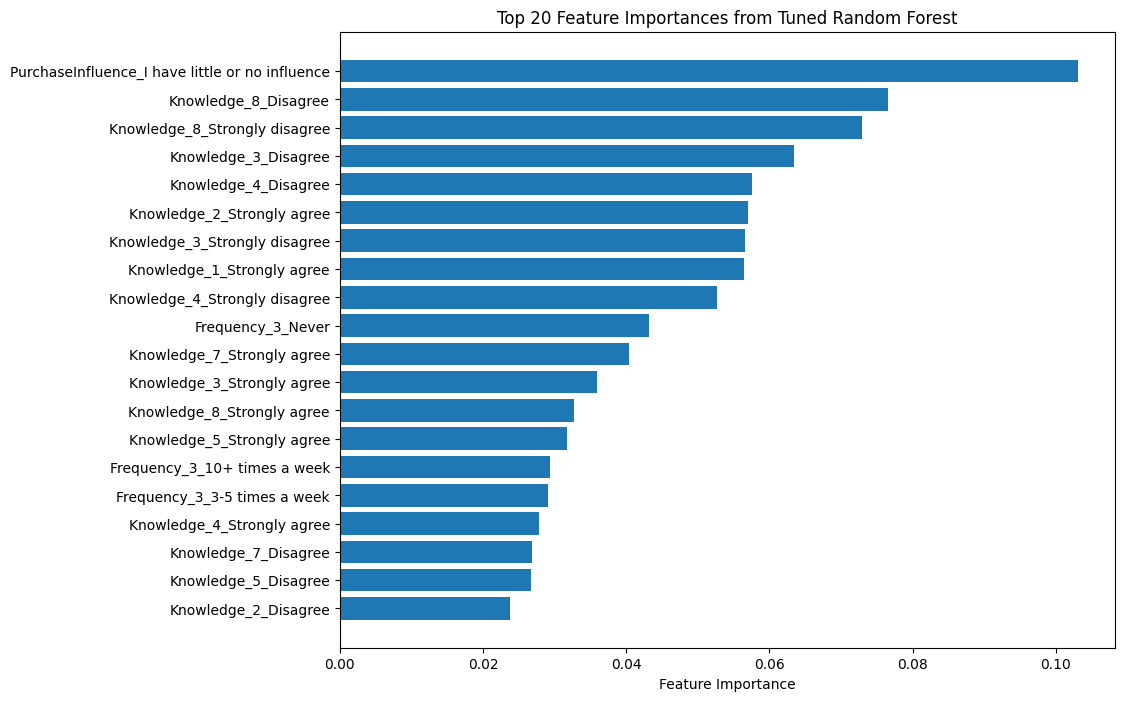

                                            Feature  Importance
0   PurchaseInfluence_I have little or no influence    0.103072
16                             Knowledge_8_Disagree    0.076555
18                    Knowledge_8_Strongly disagree    0.072959
5                              Knowledge_3_Disagree    0.063391
8                              Knowledge_4_Disagree    0.057519
3                        Knowledge_2_Strongly agree    0.057025
7                     Knowledge_3_Strongly disagree    0.056564
1                        Knowledge_1_Strongly agree    0.056478
10                    Knowledge_4_Strongly disagree    0.052640
22                                Frequency_3_Never    0.043124
15                       Knowledge_7_Strongly agree    0.040353
6                        Knowledge_3_Strongly agree    0.035982
17                       Knowledge_8_Strongly agree    0.032781
12                       Knowledge_5_Strongly agree    0.031684
19                     Frequency_3_10+ t

In [608]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit to the data without 'ResponseId'
random_search.fit(X_train_transformed_df, y_train)

# Get the best estimator
best_rf = random_search.best_estimator_

# Extract feature importances from the best model
importances = best_rf.feature_importances_
feature_names = X_train_transformed_df.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'][:20], feature_importances['Importance'][:20])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances from Tuned Random Forest')
plt.show()

# Display feature importances as DataFrame
print(feature_importances.head(20))


For the given number of features (121), **Random Forest** can indeed be a good choice for a baseline model, but it's important to weigh its pros and cons against a **Neural Network** model, especially given the differences in the types of problems each model can effectively solve. Let’s look at both:

### 1. **Random Forest as a Baseline**
Random Forest is a solid choice for a baseline model for several reasons:

- **Ease of Use**: Random Forest works well without a lot of hyperparameter tuning. It's generally good at capturing interactions between features, and it doesn’t require feature scaling, which makes it relatively easy to implement and interpret.

- **Handling Many Features**: Random Forest can handle datasets with many features effectively. Since each tree in the forest uses a subset of features, it’s capable of managing a large number of inputs without overfitting too easily.

- **Feature Importance**: Random Forest gives insights into feature importance. With 121 features, it's helpful to have a model that can directly tell you which features are contributing the most. This is useful for feature selection and understanding your data better.

- **Overfitting Risk**: Random Forest is good at avoiding overfitting by aggregating predictions across many trees. However, if you have many correlated features, Random Forest may become less effective.

- **Computational Cost**: Training a Random Forest on 121 features may be computationally intensive depending on the number of estimators (`n_estimators`) and the size of the dataset, but it’s generally feasible on a reasonably powerful machine.

- **Suitability**: Random Forest is well suited for structured/tabular data, which is typically the case when dealing with survey or categorical datasets like yours. It may not be as efficient if the underlying relationships between features are highly complex and nonlinear.

### 2. **Neural Network for Baseline**
Using a **Neural Network** as a baseline model is also possible, but there are a few key considerations:

- **Complexity Handling**: Neural Networks are powerful when dealing with complex relationships and high-dimensional data. If the relationships among the features are nonlinear and complex, a neural network can model these dependencies better than a Random Forest.

- **Scalability**: Neural Networks can scale well with a high number of features. However, the more features you have, the more likely the network will require more hidden layers and neurons to capture relationships effectively, which increases the computational complexity.

- **Hyperparameter Sensitivity**: Neural Networks are more sensitive to hyperparameter choices compared to Random Forest. You need to carefully tune learning rates, the number of layers, activation functions, etc., to get good performance. This makes them more challenging as a baseline compared to Random Forest, which can perform reasonably well with default parameters.

- **Risk of Overfitting**: Neural Networks are prone to overfitting, especially if the dataset isn't large enough. Techniques like dropout, L2 regularization, and early stopping can help, but they add to the complexity of building the model.

- **Training Time**: Neural Networks generally require more time to train compared to Random Forests, especially when the dataset is large or has many features.

- **Feature Engineering Requirement**: Neural Networks often benefit from having informative features. If your features are not particularly engineered to be useful for prediction, a Random Forest may handle the original features more efficiently without extensive feature engineering.

### **Comparison for Baseline Choice**
- **Interpretability**: Random Forest is much easier to interpret, especially with respect to understanding feature importance. Neural Networks tend to be "black boxes" and may not provide direct interpretability, which is often important in the baseline phase.
  
- **Speed and Complexity**: Random Forest is generally faster to train and evaluate, and requires fewer computational resources compared to a Neural Network. This makes Random Forest a strong candidate for a baseline to assess the feasibility of a project quickly.

- **Performance**: Neural Networks can potentially outperform Random Forests if the relationships are complex and there’s enough data for the model to learn from. However, as a baseline, the Random Forest may suffice to give you an idea of the model’s predictive power with simpler hyperparameter tuning.

- **High Feature Count**: Both Random Forest and Neural Networks can handle high feature counts, but Random Forest is often more robust in the early stages of exploration when you don't yet know which features are important. It allows you to quickly identify the most relevant features before moving to more complex models like Neural Networks.

### **Recommendation**
- Start with **Random Forest** as your baseline. It’s easier to implement, interpret, and evaluate, which allows you to quickly determine if your features have predictive power.
- Once you establish a baseline, you can try to optimize the Random Forest and, eventually, move to a **Neural Network** model to potentially improve your performance, especially if you observe that the relationships in your data are highly nonlinear and complex.
- Use **feature importance** from Random Forest to reduce the number of features, and then use those reduced features with a Neural Network to see if it performs better with a simplified, relevant input space.

In short, **Random Forest** is a suitable baseline due to its robustness and simplicity, and you can consider the **Neural Network** afterward for deeper optimization, provided you have enough data and computational resources to train it effectively.

In [609]:
num_columns = X_train_transformed_df.shape[1]
print(f"Number of columns (features) used to train the model: {num_columns}")


Number of columns (features) used to train the model: 23


In [610]:
print("Columns (features) used to train the model:")
X_train_transformed_df.columns.tolist()


Columns (features) used to train the model:


['PurchaseInfluence_I have little or no influence',
 'Knowledge_1_Strongly agree',
 'Knowledge_2_Disagree',
 'Knowledge_2_Strongly agree',
 'Knowledge_2_Strongly disagree',
 'Knowledge_3_Disagree',
 'Knowledge_3_Strongly agree',
 'Knowledge_3_Strongly disagree',
 'Knowledge_4_Disagree',
 'Knowledge_4_Strongly agree',
 'Knowledge_4_Strongly disagree',
 'Knowledge_5_Disagree',
 'Knowledge_5_Strongly agree',
 'Knowledge_5_Strongly disagree',
 'Knowledge_7_Disagree',
 'Knowledge_7_Strongly agree',
 'Knowledge_8_Disagree',
 'Knowledge_8_Strongly agree',
 'Knowledge_8_Strongly disagree',
 'Frequency_3_10+ times a week',
 'Frequency_3_3-5 times a week',
 'Frequency_3_6-10 times a week',
 'Frequency_3_Never']

In [612]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Define the Lasso model
# lasso = Lasso(max_iter=10000)

# # Set up the parameter distribution for alpha
# param_dist = {'alpha': np.logspace(-4, 2, 100)}  # Randomly sample alpha from 0.0001 to 100

# # Use RandomizedSearchCV to find the best alpha
# random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_dist, 
#                                    n_iter=50, cv=5, scoring='neg_mean_squared_error', 
#                                    random_state=42, n_jobs=-1, verbose=2)

# # Fit the model to the training data
# random_search.fit(X_train_transformed_df, y_train)

# # Get the best model and alpha
# best_lasso = random_search.best_estimator_
# best_alpha = random_search.best_params_['alpha']

# # Print the best alpha value
# print(f"Best alpha (regularization strength): {best_alpha}")

# # Predict on the training set and calculate MSE
# y_train_pred = best_lasso.predict(X_train_transformed_df)
# train_mse = mean_squared_error(y_train, y_train_pred)
# print(f"Training MSE: {train_mse}")

# # Predict on the test set
# y_test_pred = best_lasso.predict(X_test_transformed_df)
# test_mse = mean_squared_error(y_test, y_test_pred)
# print(f"Test MSE: {test_mse}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best alpha (regularization strength): 0.0005336699231206312
Training MSE: 3.6409428067573093
Test MSE: 3.5702498928551187


In [613]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Define the Lasso model
# lasso = Lasso(max_iter=10000)

# # Set up the parameter grid for alpha (regularization strength)
# param_grid = {'alpha': np.logspace(-4, 2, 100)}  # Exhaustively search alpha from 0.0001 to 100

# # Use GridSearchCV to find the best alpha
# grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, 
#                            cv=5, scoring='neg_mean_squared_error', 
#                            n_jobs=-1, verbose=2)

# # Fit the model to the training data
# grid_search.fit(X_train_transformed_df, y_train)

# # Get the best model and alpha
# best_lasso = grid_search.best_estimator_
# best_alpha = grid_search.best_params_['alpha']

# # Print the best alpha value
# print(f"Best alpha (regularization strength): {best_alpha}")

# # Predict on the training set and calculate MSE
# y_train_pred = best_lasso.predict(X_train_transformed_df)
# train_mse = mean_squared_error(y_train, y_train_pred)
# print(f"Training MSE: {train_mse}")

# # Predict on the test set
# y_test_pred = best_lasso.predict(X_test_transformed_df)
# test_mse = mean_squared_error(y_test, y_test_pred)
# print(f"Test MSE: {test_mse}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best alpha (regularization strength): 0.0005336699231206312
Training MSE: 3.6409428067573093
Test MSE: 3.5702498928551187


In [625]:
X_train_transformed_df.shape

(23271, 23)

In [626]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the Lasso model
lasso = Lasso(max_iter=10000)

# Set up the parameter grid for alpha (regularization strength)
param_grid = {'alpha': np.logspace(-4, 2, 100)}  # Exhaustively search alpha from 0.0001 to 100

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train_transformed_df, y_train)

# Get the best model and alpha
best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Print the best alpha value
print(f"Best alpha (regularization strength): {best_alpha}")

# Predict on the training set and calculate MSE and R-squared
y_train_pred = best_lasso.predict(X_train_transformed_df)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")
print(f"Training R-squared: {train_r2}")

# Predict on the test set and calculate MSE and R-squared
y_test_pred = best_lasso.predict(X_test_transformed_df)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best alpha (regularization strength): 0.0005336699231206312
Training MSE: 3.6409428067573093
Training R-squared: 0.17136362643294012
Test MSE: 3.5702498928551187
Test R-squared: 0.15505406866902283


In [ ]:
# train_r2 = r2_score(y_train, y_train_pred)
# print(f"Training R-squared: {train_r2}")

In [ ]:
# test_r2 = r2_score(y_test, y_test_pred)
# print(f"Test R-squared: {test_r2}")

In [627]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the Ridge model
ridge = Ridge(max_iter=10000)

# Set up the parameter grid for alpha (regularization strength)
param_grid = {'alpha': np.logspace(-4, 2, 100)}  # Exhaustively search alpha from 0.0001 to 100

# Use GridSearchCV to find the best alpha
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                                 cv=5, scoring='neg_mean_squared_error', 
                                 n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_ridge.fit(X_train_transformed_df, y_train)

# Get the best model and alpha
best_ridge = grid_search_ridge.best_estimator_
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Print the best alpha value
print(f"Best alpha (regularization strength) for Ridge: {best_alpha_ridge}")

# Predict on the training set and calculate MSE and R-squared
y_train_pred_ridge = best_ridge.predict(X_train_transformed_df)
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
print(f"Training MSE (Ridge): {train_mse_ridge}")
print(f"Training R-squared (Ridge): {train_r2_ridge}")

# Predict on the test set and calculate MSE and R-squared
y_test_pred_ridge = best_ridge.predict(X_test_transformed_df)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
print(f"Test MSE (Ridge): {test_mse_ridge}")
print(f"Test R-squared (Ridge): {test_r2_ridge}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best alpha (regularization strength) for Ridge: 100.0
Training MSE (Ridge): 3.6409440923672145
Training R-squared (Ridge): 0.1713633338430296
Test MSE (Ridge): 3.570288653239363
Test R-squared (Ridge): 0.15504489552149892


In [614]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Define the Ridge model
# ridge = Ridge(max_iter=10000)

# # Set up the parameter grid for alpha (regularization strength)
# param_grid = {'alpha': np.logspace(-4, 2, 100)}  # Exhaustively search alpha from 0.0001 to 100

# # Use GridSearchCV to find the best alpha
# grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, 
#                                  cv=5, scoring='neg_mean_squared_error', 
#                                  n_jobs=-1, verbose=2)

# # Fit the model to the training data
# grid_search_ridge.fit(X_train_transformed_df, y_train)

# # Get the best model and alpha
# best_ridge = grid_search_ridge.best_estimator_
# best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# # Print the best alpha value
# print(f"Best alpha (regularization strength) for Ridge: {best_alpha_ridge}")

# # Predict on the training set and calculate MSE
# y_train_pred_ridge = best_ridge.predict(X_train_transformed_df)
# train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
# print(f"Training MSE (Ridge): {train_mse_ridge}")




# # Predict on the test set and calculate MSE
# y_test_pred_ridge = best_ridge.predict(X_test_transformed_df)
# test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
# print(f"Test MSE (Ridge): {test_mse_ridge}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best alpha (regularization strength) for Ridge: 100.0
Training MSE (Ridge): 3.6409440923672145
Test MSE (Ridge): 3.570288653239363


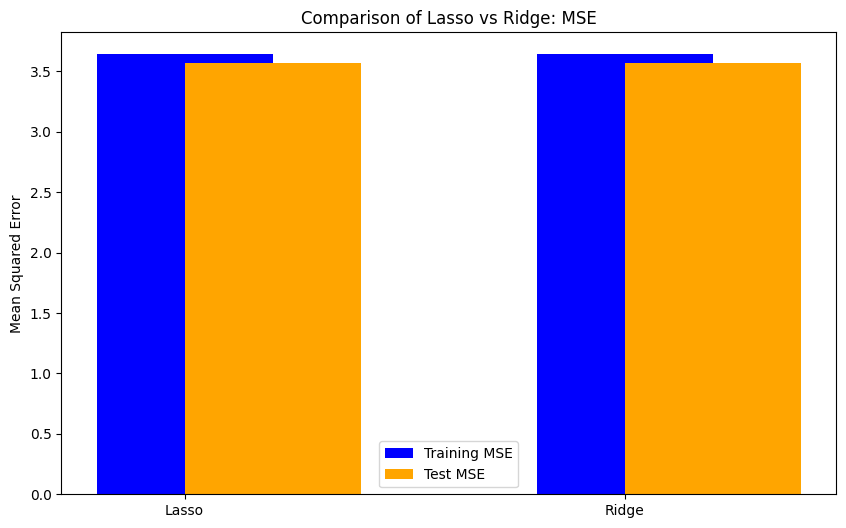

In [628]:
# Store the MSE values for Lasso and Ridge in variables (no hardcoding)
lasso_train_mse = train_mse
lasso_test_mse = test_mse

ridge_train_mse = train_mse_ridge
ridge_test_mse = test_mse_ridge

# Define the model names and MSE values for plotting
models = ['Lasso', 'Ridge']
train_mse_values = [lasso_train_mse, ridge_train_mse]
test_mse_values = [lasso_test_mse, ridge_test_mse]

# Create a plot comparing Lasso and Ridge MSE values
plt.figure(figsize=(10, 6))

# Plot training MSE values
plt.bar(models, train_mse_values, width=0.4, label='Training MSE', align='center', color='blue')

# Plot test MSE values
plt.bar(models, test_mse_values, width=0.4, label='Test MSE', align='edge', color='orange')

# Add labels and title
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Lasso vs Ridge: MSE')
plt.legend()

# Display the plot
plt.show()


In [631]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Define the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Define the parameter grid for RandomizedSearchCV
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
#     'max_depth': [None, 10, 20, 30, 40],  # Depth of trees
#     'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
#     'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
#     'max_features': ['sqrt', 'log2']  # Number of features to consider at each split (removed 'auto')
# }

# # Use RandomizedSearchCV to find the best hyperparameters
# random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
#                                       n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

# # Fit the RandomizedSearchCV model to the training data
# random_search_rf.fit(X_train_transformed_df, y_train)

# # Get the best Random Forest model and parameters
# best_rf = random_search_rf.best_estimator_
# best_params_rf = random_search_rf.best_params_

# # Print the best hyperparameters
# print(f"Best parameters for Random Forest: {best_params_rf}")

# # Predict on the training data and calculate MSE and R-squared
# y_train_pred_rf = best_rf.predict(X_train_transformed_df)
# train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
# train_r2_rf = r2_score(y_train, y_train_pred_rf)
# print(f"Training MSE (Random Forest): {train_mse_rf}")
# print(f"Training R-squared (Random Forest): {train_r2_rf}")

# # Predict on the test data and calculate MSE and R-squared
# y_test_pred_rf = best_rf.predict(X_test_transformed_df)
# test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
# test_r2_rf = r2_score(y_test, y_test_pred_rf)
# print(f"Test MSE (Random Forest): {test_mse_rf}")
# print(f"Test R-squared (Random Forest): {test_r2_rf}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Training MSE (Random Forest): 3.522918253603191
Training R-squared (Random Forest): 0.19822464647862514
Test MSE (Random Forest): 3.5866028337159843
Test R-squared (Random Forest): 0.15118393317141077


In [ ]:
# import matplotlib.pyplot as plt

# # Plot predicted vs actual values for training set
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.scatter(y_train, y_train_pred_rf, alpha=0.7, color='blue', edgecolors='k')
# plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Line of perfect prediction
# plt.xlabel('Actual (Training)')
# plt.ylabel('Predicted (Training)')
# plt.title('Random Forest: Actual vs Predicted (Training Set)')
# plt.grid(True)

# # Plot predicted vs actual values for test set
# plt.subplot(1, 2, 2)
# plt.scatter(y_test, y_test_pred_rf, alpha=0.7, color='green', edgecolors='k')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
# plt.xlabel('Actual (Test)')
# plt.ylabel('Predicted (Test)')
# plt.title('Random Forest: Actual vs Predicted (Test Set)')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


In [635]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Sort feature importances in descending order (if not already sorted)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Features to test: top 5, 10, 15, and 20 features
features_to_test = [5, 10, 15, 20]

# Dictionary to store results for each feature subset
results = {}

for num_features in features_to_test:
    # Extract the top N features based on sorted feature importance
    top_n_features = feature_importances['Feature'][:num_features].tolist()

    # Filter X_train and X_test to keep only the top N features
    X_train_topN = X_train_transformed_df[top_n_features]
    X_test_topN = X_test_transformed_df[top_n_features]

    # Define the Lasso model
    lasso = Lasso(max_iter=10000)

    # Set up the parameter grid for alpha (regularization strength)
    param_grid = {'alpha': np.logspace(-4, 2, 100)}  # Exhaustively search alpha from 0.0001 to 100

    # Use GridSearchCV to find the best alpha
    grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, 
                               cv=5, scoring='neg_mean_squared_error', 
                               n_jobs=-1, verbose=2)

    # Fit the model to the training data with the top N features
    grid_search.fit(X_train_topN, y_train)

    # Get the best Lasso model and alpha
    best_lasso = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha']

    # Print the best alpha value
    print(f"\nTop {num_features} Features:")
    print(f"Best alpha (regularization strength): {best_alpha}")

    # Predict on the training set and calculate MSE and R-squared
    y_train_pred = best_lasso.predict(X_train_topN)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f"Training MSE: {train_mse}")
    print(f"Training R-squared: {train_r2}")

    # Predict on the test set and calculate MSE and R-squared
    y_test_pred = best_lasso.predict(X_test_topN)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"Test MSE: {test_mse}")
    print(f"Test R-squared: {test_r2}")

    # Store results in the dictionary
    results[num_features] = {'Best Alpha': best_alpha, 
                             'Training MSE': train_mse, 
                             'Training R-squared': train_r2, 
                             'Test MSE': test_mse, 
                             'Test R-squared': test_r2}

# Print final results summary
print("\nSummary of Results for Different Feature Subsets:")
for num_features, metrics in results.items():
    print(f"\nTop {num_features} Features:")
    print(f"Best Alpha: {metrics['Best Alpha']}")
    print(f"Training MSE: {metrics['Training MSE']}")
    print(f"Training R-squared: {metrics['Training R-squared']}")
    print(f"Test MSE: {metrics['Test MSE']}")
    print(f"Test R-squared: {metrics['Test R-squared']}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits



Top 5 Features:
Best alpha (regularization strength): 0.00011497569953977356
Training MSE: 3.949612616938466
Training R-squared: 0.10111395602794282
Test MSE: 3.8588685706309316
Test R-squared: 0.08674871615551016
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Top 10 Features:
Best alpha (regularization strength): 0.0001
Training MSE: 3.75159170220309
Training R-squared: 0.14618122057607597
Test MSE: 3.6770636662461276
Test R-squared: 0.1297752041790451
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Top 15 Features:
Best alpha (regularization strength): 0.0001
Training MSE: 3.683457838488583
Training R-squared: 0.16168769808534067
Test MSE: 3.6125239904155992
Test R-squared: 0.14504935532783647
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Top 20 Features:
Best alpha (regularization strength): 0.0001
Training MSE: 3.6592790864601086
Training R-squared: 0.16719050174407113
Test MSE: 3.5921002875283934
Test R-squared: 0.149882889443135

In [636]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Sort feature importances in descending order (if not already sorted)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Features to test: top 5, 10, 15, and 20 features
features_to_test = [5, 10, 15, 20]

# Dictionary to store results for each feature subset
results_ridge = {}

for num_features in features_to_test:
    # Extract the top N features based on sorted feature importance
    top_n_features = feature_importances['Feature'][:num_features].tolist()

    # Filter X_train and X_test to keep only the top N features
    X_train_topN = X_train_transformed_df[top_n_features]
    X_test_topN = X_test_transformed_df[top_n_features]

    # Define the Ridge model
    ridge = Ridge(max_iter=10000)

    # Set up the parameter grid for alpha (regularization strength)
    param_grid = {'alpha': np.logspace(-4, 2, 100)}  # Exhaustively search alpha from 0.0001 to 100

    # Use GridSearchCV to find the best alpha
    grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                                     cv=5, scoring='neg_mean_squared_error', 
                                     n_jobs=-1, verbose=2)

    # Fit the model to the training data with the top N features
    grid_search_ridge.fit(X_train_topN, y_train)

    # Get the best Ridge model and alpha
    best_ridge = grid_search_ridge.best_estimator_
    best_alpha_ridge = grid_search_ridge.best_params_['alpha']

    # Print the best alpha value
    print(f"\nTop {num_features} Features (Ridge):")
    print(f"Best alpha (regularization strength): {best_alpha_ridge}")

    # Predict on the training set and calculate MSE and R-squared
    y_train_pred_ridge = best_ridge.predict(X_train_topN)
    train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
    train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
    print(f"Training MSE (Ridge): {train_mse_ridge}")
    print(f"Training R-squared (Ridge): {train_r2_ridge}")

    # Predict on the test set and calculate MSE and R-squared
    y_test_pred_ridge = best_ridge.predict(X_test_topN)
    test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
    test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
    print(f"Test MSE (Ridge): {test_mse_ridge}")
    print(f"Test R-squared (Ridge): {test_r2_ridge}")

    # Store results in the dictionary
    results_ridge[num_features] = {'Best Alpha': best_alpha_ridge, 
                                   'Training MSE': train_mse_ridge, 
                                   'Training R-squared': train_r2_ridge, 
                                   'Test MSE': test_mse_ridge, 
                                   'Test R-squared': test_r2_ridge}

# Print final results summary for Ridge
print("\nSummary of Ridge Results for Different Feature Subsets:")
for num_features, metrics in results_ridge.items():
    print(f"\nTop {num_features} Features (Ridge):")
    print(f"Best Alpha: {metrics['Best Alpha']}")
    print(f"Training MSE: {metrics['Training MSE']}")
    print(f"Training R-squared: {metrics['Training R-squared']}")
    print(f"Test MSE: {metrics['Test MSE']}")
    print(f"Test R-squared: {metrics['Test R-squared']}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits

Top 5 Features (Ridge):
Best alpha (regularization strength): 100.0
Training MSE (Ridge): 3.9496177587040506
Training R-squared (Ridge): 0.10111278582170402
Test MSE (Ridge): 3.8587099227703754
Test R-squared (Ridge): 0.08678626222884245
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Top 10 Features (Ridge):
Best alpha (regularization strength): 100.0
Training MSE (Ridge): 3.751596345062248
Training R-squared (Ridge): 0.1461801639151561
Test MSE (Ridge): 3.676929767665632
Test R-squared (Ridge): 0.12980689301433568
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Top 15 Features (Ridge):
Best alpha (regularization strength): 100.0
Training MSE (Ridge): 3.683461469109933
Training R-squared (Ridge): 0.161686871798011
Test MSE (Ridge): 3.6124253572615976
Test R-squared (Ridge): 0.14507269814267265
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Top 20 Features (Ridge):
Best alph

Epoch 1/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 17.7738 - val_loss: 4.2313
Epoch 2/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0186 - val_loss: 3.8892
Epoch 3/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8360 - val_loss: 3.8364
Epoch 4/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7568 - val_loss: 3.7937
Epoch 5/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5998 - val_loss: 3.7949
Epoch 6/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5717 - val_loss: 3.7642
Epoch 7/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6697 - val_loss: 3.7716
Epoch 8/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5270 - val_loss: 3.8036
Epoch 9/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5688 - val_loss: 3.7997
Epoch 10/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5286 - val_loss: 3.7747
Epoch 11/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4928 - val_loss: 3.7879
Epoch 12/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

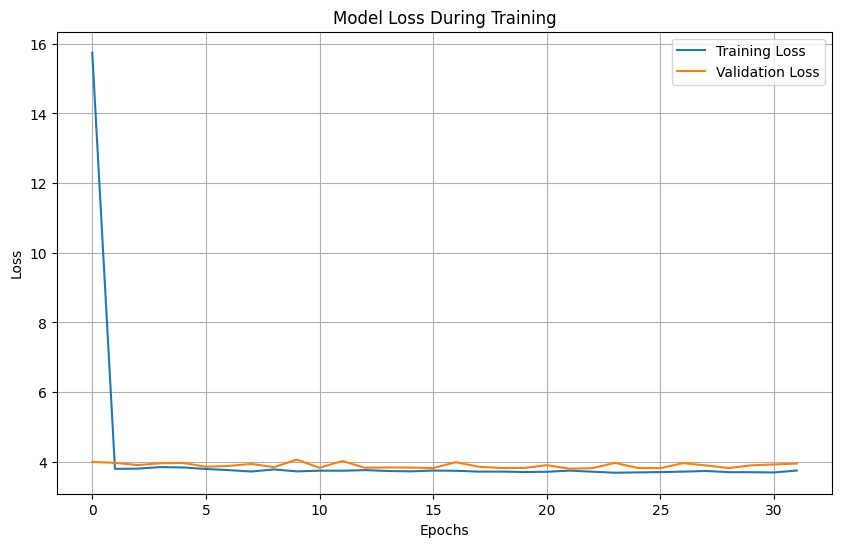

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE (Neural Network): 3.6152300677734592
Test R-squared (Neural Network): 0.14440892703233632


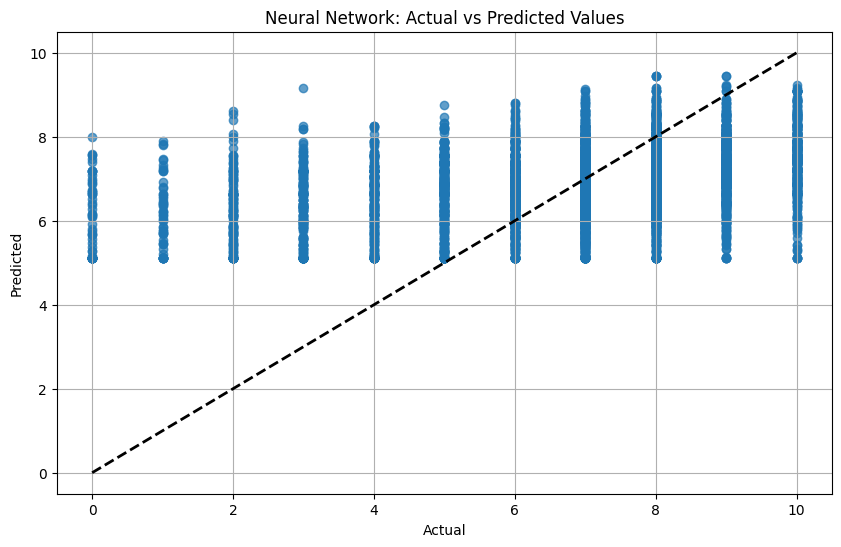

In [634]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Function to build the model
def create_model(learning_rate=0.001, neurons=32):
    model = Sequential()
    
    # Input layer using the `Input` function
    model.add(Input(shape=(X_train_transformed_df.shape[1],)))  # Use Input to specify the input shape
    
    # First hidden layer
    model.add(Dense(neurons, activation='relu'))
    
    # Second hidden layer (you can add more layers as needed)
    model.add(Dense(neurons, activation='relu'))
    
    # Output layer (1 output for regression)
    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    return model


# Set the hyperparameters you want to tune
param_dist = {
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200]
}

# Manual cross-validation with early stopping
kf = KFold(n_splits=3, shuffle=True, random_state=42)

best_mse = float("inf")
best_params = {}

# Loop through the hyperparameters
for neurons in param_dist['neurons']:
    for learning_rate in param_dist['learning_rate']:
        for batch_size in param_dist['batch_size']:
            for epochs in param_dist['epochs']:
                fold_mse = []
                # Cross-validation
                for train_index, val_index in kf.split(X_train_transformed_df):
                    X_train_cv, X_val_cv = X_train_transformed_df.iloc[train_index], X_train_transformed_df.iloc[val_index]
                    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                    
                    model = create_model(learning_rate=learning_rate, neurons=neurons)
                    
                    # Early stopping callback
                    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                    
                    # Fit the model with progress display (verbose=1)
                    history = model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, 
                                        validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping], verbose=1)
                    
                    # Predict on the validation set
                    y_val_pred = model.predict(X_val_cv)
                    mse = mean_squared_error(y_val_cv, y_val_pred)
                    fold_mse.append(mse)
                
                avg_mse = np.mean(fold_mse)
                
                if avg_mse < best_mse:
                    best_mse = avg_mse
                    best_params = {'neurons': neurons, 'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}

# Print the best hyperparameters and MSE
print(f"Best hyperparameters: {best_params}")
print(f"Best MSE: {best_mse}")

# Train the best model on the entire training set
best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'])

# Fit the model with verbose=1 and capture history
history = best_model.fit(X_train_transformed_df, y_train, epochs=best_params['epochs'], 
                         batch_size=best_params['batch_size'], validation_split=0.2, 
                         callbacks=[early_stopping], verbose=1)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test set and calculate MSE and R-squared
y_test_pred_nn = best_model.predict(X_test_transformed_df)
test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

# Print MSE and R-squared
print(f"Test MSE (Neural Network): {test_mse_nn}")
print(f"Test R-squared (Neural Network): {test_r2_nn}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network: Actual vs Predicted Values')
plt.grid(True)
plt.show()


Epoch 1/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 23.4152 - val_loss: 3.9768
Epoch 2/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9865 - val_loss: 3.9510
Epoch 3/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9716 - val_loss: 3.9823
Epoch 4/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9739 - val_loss: 3.9620
Epoch 5/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0008 - val_loss: 3.9635
Epoch 6/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0236 - val_loss: 3.9521
Epoch 7/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9544 - val_loss: 3.9570
Epoch 8/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0142 - val_loss: 3.9471
Epoch 9/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0212 - val_loss: 3.9447
Epoch 10/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9631 - val_loss: 3.9519
Epoch 11/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9600 - val_loss: 3.9433
Epoch 12/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

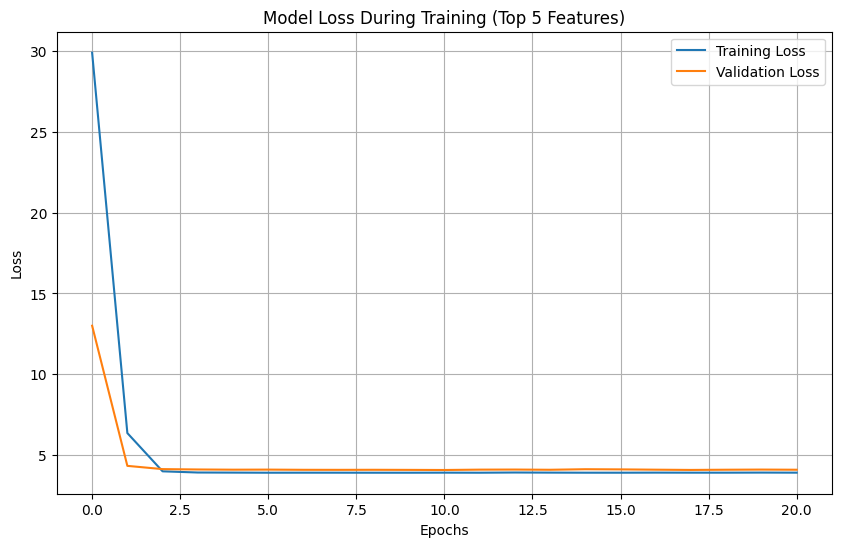

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE (Neural Network with 5 features): 3.8574252235080433
Test R-squared (Neural Network with 5 features): 0.08709030296752118


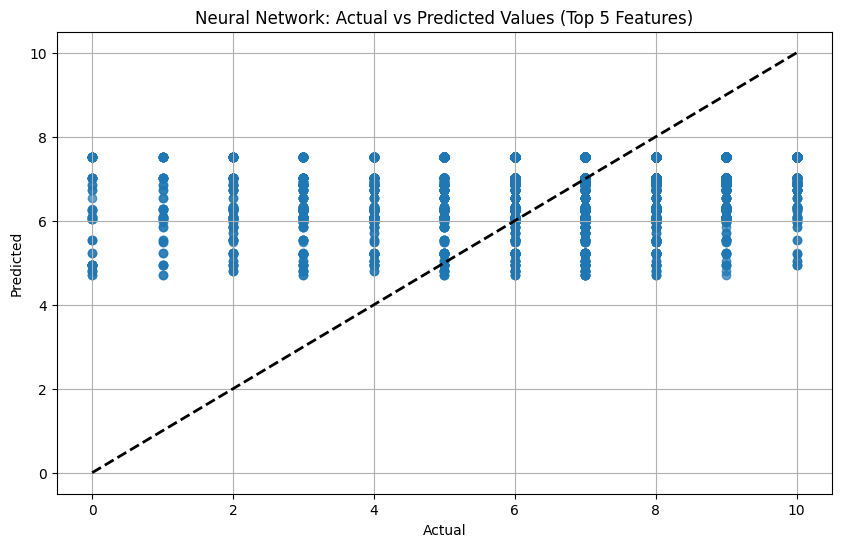

Epoch 1/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 23.4675 - val_loss: 3.9275
Epoch 2/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9294 - val_loss: 3.8017
Epoch 3/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7577 - val_loss: 3.8153
Epoch 4/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7711 - val_loss: 3.8207
Epoch 5/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8021 - val_loss: 3.7736
Epoch 6/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7492 - val_loss: 3.7930
Epoch 7/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8196 - val_loss: 3.7766
Epoch 8/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8321 - val_loss: 3.7615
Epoch 9/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7420 - val_loss: 3.7771
Epoch 10/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7423 - val_loss: 3.7520
Epoch 11/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7730 - val_loss: 3.8042
Epoch 12/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

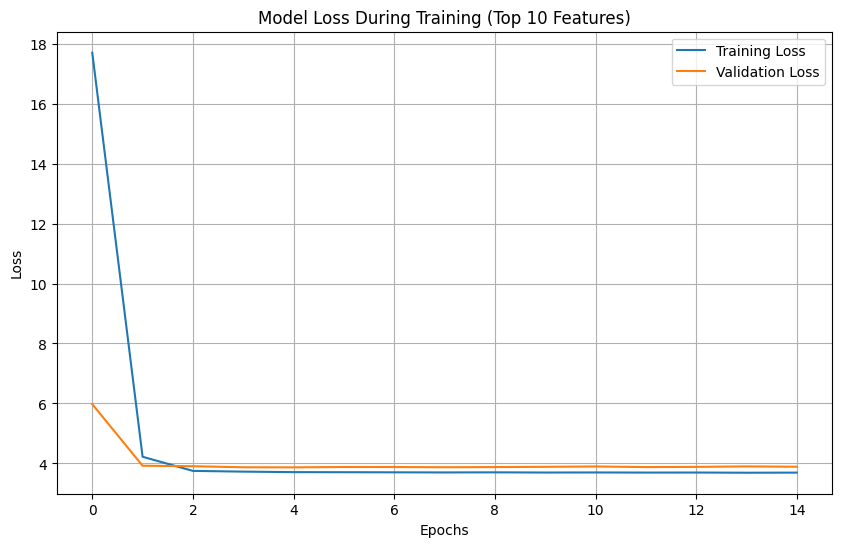

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE (Neural Network with 10 features): 3.6959390206198224
Test R-squared (Neural Network with 10 features): 0.1253081068163645


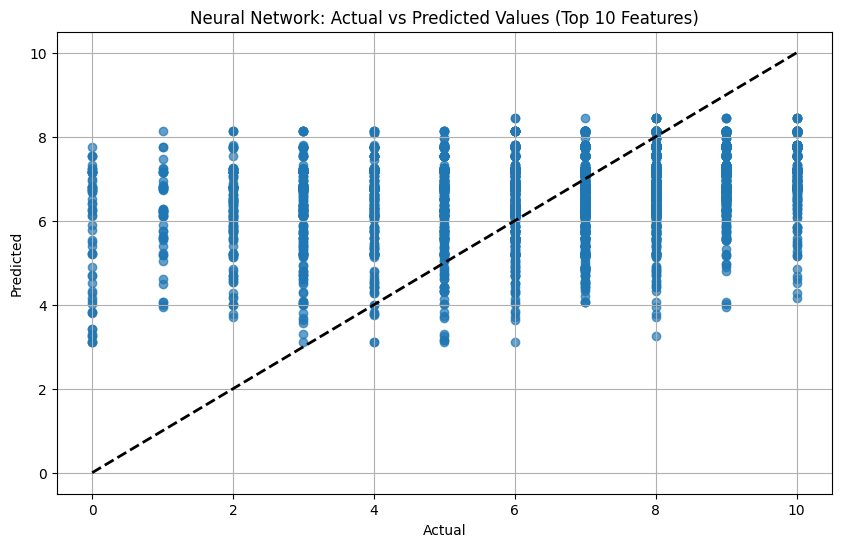

Epoch 1/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 23.4919 - val_loss: 4.1171
Epoch 2/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9883 - val_loss: 3.8260
Epoch 3/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8513 - val_loss: 3.7745
Epoch 4/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7226 - val_loss: 3.7815
Epoch 5/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6802 - val_loss: 3.7795
Epoch 6/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6833 - val_loss: 3.7593
Epoch 7/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6893 - val_loss: 3.7558
Epoch 8/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7386 - val_loss: 3.7920
Epoch 9/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6567 - val_loss: 3.7602
Epoch 10/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6220 - val_loss: 3.7594
Epoch 11/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5774 - val_loss: 3.7374
Epoch 12/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

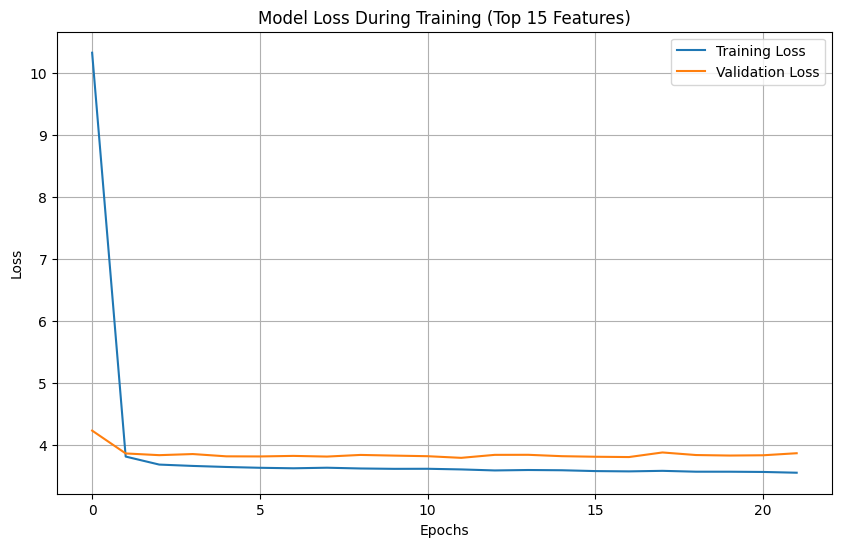

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE (Neural Network with 15 features): 3.655378897224976
Test R-squared (Neural Network with 15 features): 0.13490718594674755


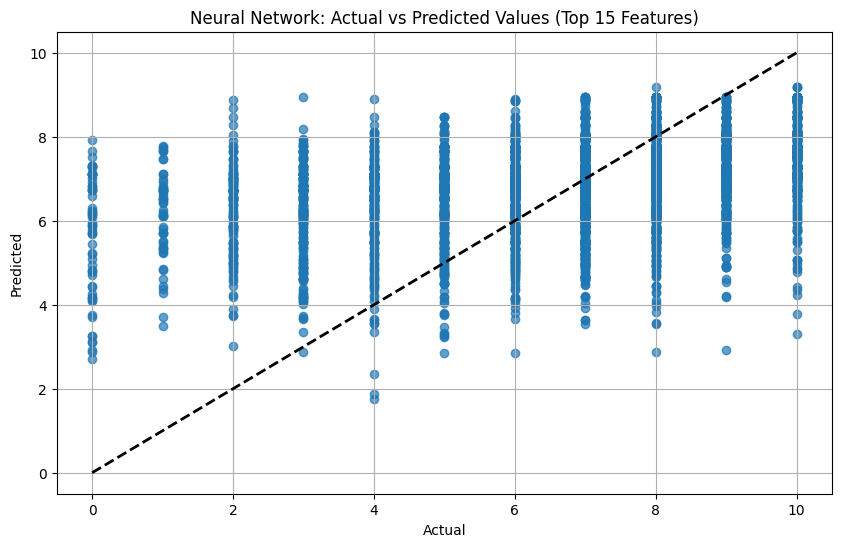

Epoch 1/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19.9064 - val_loss: 4.2205
Epoch 2/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9859 - val_loss: 3.8979
Epoch 3/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8707 - val_loss: 3.8094
Epoch 4/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7079 - val_loss: 3.7718
Epoch 5/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6528 - val_loss: 3.8038
Epoch 6/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5102 - val_loss: 3.8012
Epoch 7/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7024 - val_loss: 3.7847
Epoch 8/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6790 - val_loss: 3.7530
Epoch 9/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6356 - val_loss: 3.7971
Epoch 10/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5903 - val_loss: 3.7504
Epoch 11/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6382 - val_loss: 3.7382
Epoch 12/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

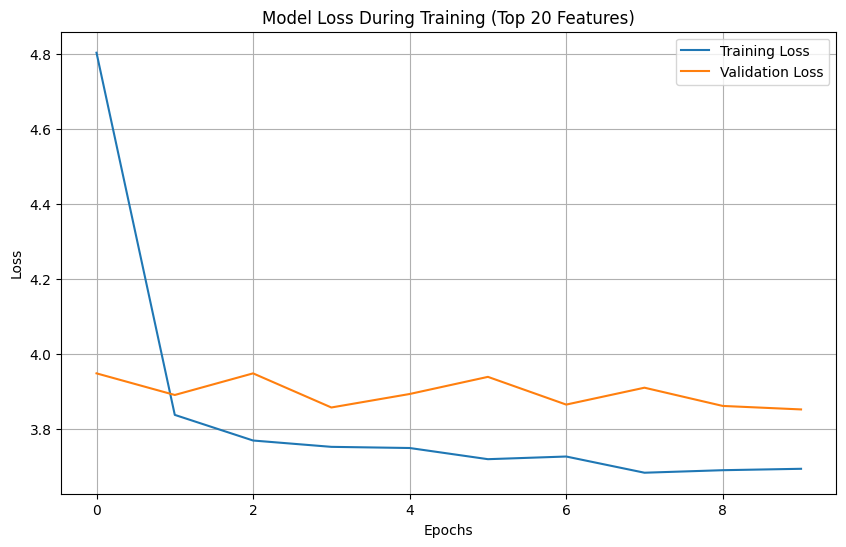

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE (Neural Network with 20 features): 3.8696823952718016
Test R-squared (Neural Network with 20 features): 0.08418948433515072


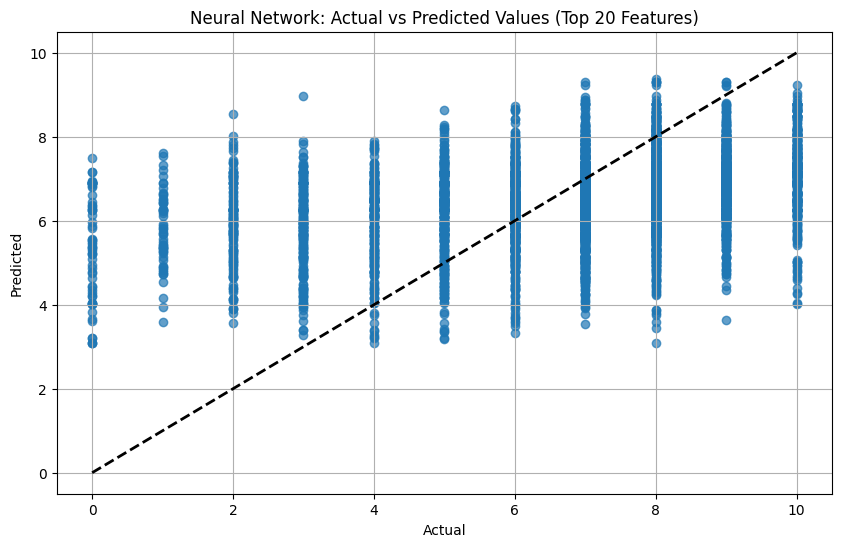


Number of Features: 5
Test MSE: 3.8574252235080433
Test R-squared: 0.08709030296752118

Number of Features: 10
Test MSE: 3.6959390206198224
Test R-squared: 0.1253081068163645

Number of Features: 15
Test MSE: 3.655378897224976
Test R-squared: 0.13490718594674755

Number of Features: 20
Test MSE: 3.8696823952718016
Test R-squared: 0.08418948433515072


In [637]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Function to build the model
def create_model(learning_rate=0.001, neurons=32):
    model = Sequential()
    
    # Input layer using the `Input` function
    model.add(Input(shape=(X_train_subset.shape[1],)))  # Use Input to specify the input shape for subsets
    
    # First hidden layer
    model.add(Dense(neurons, activation='relu'))
    
    # Second hidden layer (you can add more layers as needed)
    model.add(Dense(neurons, activation='relu'))
    
    # Output layer (1 output for regression)
    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    return model


# Set the hyperparameters you want to tune
param_dist = {
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200]
}

# Top 5, 10, 15, and 20 features
features_to_test = [5, 10, 15, 20]
results = {}

# Manual cross-validation with early stopping
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for num_features in features_to_test:
    
    # Extract top N features based on feature importance
    top_n_features = feature_importances['Feature'][:num_features].tolist()
    
    # Filter X_train and X_test to keep only the top N features
    X_train_subset = X_train_transformed_df[top_n_features]
    X_test_subset = X_test_transformed_df[top_n_features]
    
    best_mse = float("inf")
    best_params = {}
    
    # Loop through the hyperparameters
    for neurons in param_dist['neurons']:
        for learning_rate in param_dist['learning_rate']:
            for batch_size in param_dist['batch_size']:
                for epochs in param_dist['epochs']:
                    fold_mse = []
                    # Cross-validation
                    for train_index, val_index in kf.split(X_train_subset):
                        X_train_cv, X_val_cv = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
                        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                        
                        model = create_model(learning_rate=learning_rate, neurons=neurons)
                        
                        # Early stopping callback
                        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                        
                        # Fit the model with progress display (verbose=1)
                        history = model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, 
                                            validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping], verbose=1)
                        
                        # Predict on the validation set
                        y_val_pred = model.predict(X_val_cv)
                        mse = mean_squared_error(y_val_cv, y_val_pred)
                        fold_mse.append(mse)
                    
                    avg_mse = np.mean(fold_mse)
                    
                    if avg_mse < best_mse:
                        best_mse = avg_mse
                        best_params = {'neurons': neurons, 'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}
    
    # Print the best hyperparameters and MSE for this subset of features
    print(f"\nNumber of features: {num_features}")
    print(f"Best hyperparameters: {best_params}")
    print(f"Best MSE: {best_mse}")
    
    # Train the best model on the entire training set
    best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'])
    
    # Fit the model with verbose=1 and capture history
    history = best_model.fit(X_train_subset, y_train, epochs=best_params['epochs'], 
                             batch_size=best_params['batch_size'], validation_split=0.2, 
                             callbacks=[early_stopping], verbose=1)
    
    # Plot training and validation loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss During Training (Top {num_features} Features)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Predict on the test set and calculate MSE and R-squared
    y_test_pred_nn = best_model.predict(X_test_subset)
    test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
    test_r2_nn = r2_score(y_test, y_test_pred_nn)
    
    # Print MSE and R-squared
    print(f"Test MSE (Neural Network with {num_features} features): {test_mse_nn}")
    print(f"Test R-squared (Neural Network with {num_features} features): {test_r2_nn}")
    
    # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Neural Network: Actual vs Predicted Values (Top {num_features} Features)')
    plt.grid(True)
    plt.show()
    
    # Store results for each feature count
    results[num_features] = {'Test MSE': test_mse_nn, 'Test R-squared': test_r2_nn}
    
# Print final results summary
for num_features, metrics in results.items():
    print(f"\nNumber of Features: {num_features}")
    print(f"Test MSE: {metrics['Test MSE']}")
    print(f"Test R-squared: {metrics['Test R-squared']}")


In [638]:
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Input
# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt


# # Function to build the model
# def create_model(learning_rate=0.001, neurons=32):
#     model = Sequential()
    
#     # Input layer using the `Input` function
#     model.add(Input(shape=(X_train_transformed_df.shape[1],)))  # Use Input to specify the input shape
    
#     # First hidden layer
#     model.add(Dense(neurons, activation='relu'))
    
#     # Second hidden layer (you can add more layers as needed)
#     model.add(Dense(neurons, activation='relu'))
    
#     # Output layer (1 output for regression)
#     model.add(Dense(1, activation='linear'))
    
#     # Compile the model
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
#     return model


# # Set the hyperparameters you want to tune
# param_dist = {
#     'neurons': [32, 64, 128],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'batch_size': [32, 64, 128],
#     'epochs': [50, 100, 200]
# }

# # Manual cross-validation with early stopping
# kf = KFold(n_splits=3, shuffle=True, random_state=42)

# best_mse = float("inf")
# best_params = {}

# # Loop through the hyperparameters
# for neurons in param_dist['neurons']:
#     for learning_rate in param_dist['learning_rate']:
#         for batch_size in param_dist['batch_size']:
#             for epochs in param_dist['epochs']:
#                 fold_mse = []
#                 # Cross-validation
#                 for train_index, val_index in kf.split(X_train_transformed_df):
#                     X_train_cv, X_val_cv = X_train_transformed_df.iloc[train_index], X_train_transformed_df.iloc[val_index]
#                     y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                    
#                     model = create_model(learning_rate=learning_rate, neurons=neurons)
                    
#                     # Early stopping callback
#                     early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                    
#                     # Fit the model
#                     model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, validation_data=(X_val_cv, y_val_cv),
#                               callbacks=[early_stopping], verbose=0)
                    
#                     # Predict on the validation set
#                     y_val_pred = model.predict(X_val_cv)
#                     mse = mean_squared_error(y_val_cv, y_val_pred)
#                     fold_mse.append(mse)
                
#                 avg_mse = np.mean(fold_mse)
                
#                 if avg_mse < best_mse:
#                     best_mse = avg_mse
#                     best_params = {'neurons': neurons, 'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}

# # Print the best hyperparameters and MSE
# print(f"Best hyperparameters: {best_params}")
# print(f"Best MSE: {best_mse}")

# # Train the best model on the entire training set
# best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'])

# best_model.fit(X_train_transformed_df, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], 
#                validation_split=0.2, callbacks=[early_stopping])




# # Predict on the test set and calculate MSE and R-squared
# y_test_pred_nn = best_model.predict(X_test_transformed_df)
# test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
# test_r2_nn = r2_score(y_test, y_test_pred_nn)

# # Print MSE and R-squared
# print(f"Test MSE (Neural Network): {test_mse_nn}")
# print(f"Test R-squared (Neural Network): {test_r2_nn}")

# # Plot predicted vs actual values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Neural Network: Actual vs Predicted Values')
# plt.grid(True)
# plt.show()

# # # Predict on the test set and calculate MSE
# # y_test_pred_nn = best_model.predict(X_test_transformed_df)
# # test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
# # print(f"Test MSE (Neural Network): {test_mse_nn}")


In [640]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Function to build the model with regularization, dropout, batch normalization, and more layers
def create_model(learning_rate=0.001, neurons=32, dropout_rate=0.2, l2_lambda=0.01):
    model = Sequential()
    
    # Input layer using the `Input` function
    model.add(Input(shape=(X_train_subset.shape[1],)))
    
    # First hidden layer with L2 regularization, dropout, and batch normalization
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())  # Adding BatchNormalization
    model.add(Dropout(dropout_rate))
    
    # Second hidden layer with L2 regularization, dropout, and batch normalization
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())  # Adding BatchNormalization
    model.add(Dropout(dropout_rate))
    
    # Additional third hidden layer to increase capacity
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())  # Adding BatchNormalization
    model.add(Dropout(dropout_rate))
    
    # Output layer (1 output for regression)
    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    return model

# Set the hyperparameters you want to tune, including dropout and L2 regularization
param_dist = {
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200],
    'dropout_rate': [0.2, 0.3],  # Dropout rates to experiment with
    'l2_lambda': [0.01, 0.001]   # L2 regularization strength to try
}

# Top 5, 10, 15, and 20 features
features_to_test = [5, 10, 15, 20]
results = {}

# Manual cross-validation with early stopping and learning rate scheduler
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for num_features in features_to_test:
    
    # Extract top N features based on feature importance
    top_n_features = feature_importances['Feature'][:num_features].tolist()
    
    # Filter X_train and X_test to keep only the top N features
    X_train_subset = X_train_transformed_df[top_n_features]
    X_test_subset = X_test_transformed_df[top_n_features]
    
    best_mse = float("inf")
    best_params = {}
    
    # Loop through the hyperparameters
    for neurons in param_dist['neurons']:
        for learning_rate in param_dist['learning_rate']:
            for batch_size in param_dist['batch_size']:
                for epochs in param_dist['epochs']:
                    for dropout_rate in param_dist['dropout_rate']:
                        for l2_lambda in param_dist['l2_lambda']:
                            fold_mse = []
                            # Cross-validation
                            for train_index, val_index in kf.split(X_train_subset):
                                X_train_cv, X_val_cv = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
                                y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                                
                                model = create_model(learning_rate=learning_rate, neurons=neurons, 
                                                     dropout_rate=dropout_rate, l2_lambda=l2_lambda)
                                
                                # Early stopping and learning rate scheduler callbacks
                                early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                                lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
                                
                                # Fit the model with progress display (verbose=1)
                                history = model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, 
                                                    validation_data=(X_val_cv, y_val_cv), 
                                                    callbacks=[early_stopping, lr_scheduler], verbose=1)
                                
                                # Predict on the validation set
                                y_val_pred = model.predict(X_val_cv)
                                mse = mean_squared_error(y_val_cv, y_val_pred)
                                fold_mse.append(mse)
                            
                            avg_mse = np.mean(fold_mse)
                            
                            if avg_mse < best_mse:
                                best_mse = avg_mse
                                best_params = {'neurons': neurons, 'learning_rate': learning_rate, 
                                               'batch_size': batch_size, 'epochs': epochs,
                                               'dropout_rate': dropout_rate, 'l2_lambda': l2_lambda}
    
    # Print the best hyperparameters and MSE for this subset of features
    print(f"\nNumber of features: {num_features}")
    print(f"Best hyperparameters: {best_params}")
    print(f"Best MSE: {best_mse}")
    
    # Train the best model on the entire training set
    best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'],
                              dropout_rate=best_params['dropout_rate'], l2_lambda=best_params['l2_lambda'])
    
    # Fit the model with verbose=1 and capture history
    history = best_model.fit(X_train_subset, y_train, epochs=best_params['epochs'], 
                             batch_size=best_params['batch_size'], validation_split=0.2, 
                             callbacks=[early_stopping, lr_scheduler], verbose=1)
    
    # Plot training and validation loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss During Training (Top {num_features} Features)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Predict on the test set and calculate MSE and R-squared
    y_test_pred_nn = best_model.predict(X_test_subset)
    test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
    test_r2_nn = r2_score(y_test, y_test_pred_nn)
    
    # Print MSE and R-squared
    print(f"Test MSE (Neural Network with {num_features} features): {test_mse_nn}")
    print(f"Test R-squared (Neural Network with {num_features} features): {test_r2_nn}")
    
    # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Neural Network: Actual vs Predicted Values (Top {num_features} Features)')
    plt.grid(True)
    plt.show()
    
    # Store results for each feature count
    results[num_features] = {'Test MSE': test_mse_nn, 'Test R-squared': test_r2_nn}
    
# Print final results summary
for num_features, metrics in results.items():
    print(f"\nNumber of Features: {num_features}")
    print(f"Test MSE: {metrics['Test MSE']}")
    print(f"Test R-squared: {metrics['Test R-squared']}")


Epoch 1/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 39.6945 - val_loss: 5.0255 - learning_rate: 0.0010
Epoch 2/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.8958 - val_loss: 4.6953 - learning_rate: 0.0010
Epoch 3/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.1214 - val_loss: 4.6392 - learning_rate: 0.0010
Epoch 4/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.5434 - val_loss: 4.5594 - learning_rate: 0.0010
Epoch 5/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.4310 - val_loss: 4.4928 - learning_rate: 0.0010
Epoch 6/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.2002 - val_loss: 4.4444 - learning_rate: 0.0010
Epoch 7/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.1078 - val_loss: 4.4126 - learning_rate: 0.0010
Epoch 8/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.9755 - val_loss: 4.3724 - learning_rate: 0.0010
Epoch 9/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.9400 - val_loss: 4.2907 - learning_rate: 0.0010
Epoch 10/

KeyboardInterrupt: 

In [639]:
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Input
# from tensorflow.keras.regularizers import l2
# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt

# # Function to build the model with regularization, dropout, and more layers
# def create_model(learning_rate=0.001, neurons=32, dropout_rate=0.2, l2_lambda=0.01):
#     model = Sequential()
    
#     # Input layer using the `Input` function
#     model.add(Input(shape=(X_train_subset.shape[1],)))
    
#     # First hidden layer with L2 regularization and dropout
#     model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
#     model.add(Dropout(dropout_rate))
    
#     # Second hidden layer with L2 regularization and dropout
#     model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
#     model.add(Dropout(dropout_rate))
    
#     # Additional third hidden layer to increase capacity
#     model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
#     model.add(Dropout(dropout_rate))
    
#     # Output layer (1 output for regression)
#     model.add(Dense(1, activation='linear'))
    
#     # Compile the model
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
#     return model

# # Set the hyperparameters you want to tune, including dropout and L2 regularization
# param_dist = {
#     'neurons': [32, 64, 128],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'batch_size': [32, 64, 128],
#     'epochs': [50, 100, 200],
#     'dropout_rate': [0.2, 0.3],  # Dropout rates to experiment with
#     'l2_lambda': [0.01, 0.001]   # L2 regularization strength to try
# }

# # Top 5, 10, 15, and 20 features
# features_to_test = [5, 10, 15, 20]
# results = {}

# # Manual cross-validation with early stopping
# kf = KFold(n_splits=3, shuffle=True, random_state=42)

# for num_features in features_to_test:
    
#     # Extract top N features based on feature importance
#     top_n_features = feature_importances['Feature'][:num_features].tolist()
    
#     # Filter X_train and X_test to keep only the top N features
#     X_train_subset = X_train_transformed_df[top_n_features]
#     X_test_subset = X_test_transformed_df[top_n_features]
    
#     best_mse = float("inf")
#     best_params = {}
    
#     # Loop through the hyperparameters
#     for neurons in param_dist['neurons']:
#         for learning_rate in param_dist['learning_rate']:
#             for batch_size in param_dist['batch_size']:
#                 for epochs in param_dist['epochs']:
#                     for dropout_rate in param_dist['dropout_rate']:
#                         for l2_lambda in param_dist['l2_lambda']:
#                             fold_mse = []
#                             # Cross-validation
#                             for train_index, val_index in kf.split(X_train_subset):
#                                 X_train_cv, X_val_cv = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
#                                 y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                                
#                                 model = create_model(learning_rate=learning_rate, neurons=neurons, 
#                                                      dropout_rate=dropout_rate, l2_lambda=l2_lambda)
                                
#                                 # Early stopping callback
#                                 early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                                
#                                 # Fit the model with progress display (verbose=1)
#                                 history = model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, 
#                                                     validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping], verbose=1)
                                
#                                 # Predict on the validation set
#                                 y_val_pred = model.predict(X_val_cv)
#                                 mse = mean_squared_error(y_val_cv, y_val_pred)
#                                 fold_mse.append(mse)
                            
#                             avg_mse = np.mean(fold_mse)
                            
#                             if avg_mse < best_mse:
#                                 best_mse = avg_mse
#                                 best_params = {'neurons': neurons, 'learning_rate': learning_rate, 
#                                                'batch_size': batch_size, 'epochs': epochs,
#                                                'dropout_rate': dropout_rate, 'l2_lambda': l2_lambda}
    
#     # Print the best hyperparameters and MSE for this subset of features
#     print(f"\nNumber of features: {num_features}")
#     print(f"Best hyperparameters: {best_params}")
#     print(f"Best MSE: {best_mse}")
    
#     # Train the best model on the entire training set
#     best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'],
#                               dropout_rate=best_params['dropout_rate'], l2_lambda=best_params['l2_lambda'])
    
#     # Fit the model with verbose=1 and capture history
#     history = best_model.fit(X_train_subset, y_train, epochs=best_params['epochs'], 
#                              batch_size=best_params['batch_size'], validation_split=0.2, 
#                              callbacks=[early_stopping], verbose=1)
    
#     # Plot training and validation loss over epochs
#     plt.figure(figsize=(10, 6))
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title(f'Model Loss During Training (Top {num_features} Features)')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
    
#     # Predict on the test set and calculate MSE and R-squared
#     y_test_pred_nn = best_model.predict(X_test_subset)
#     test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
#     test_r2_nn = r2_score(y_test, y_test_pred_nn)
    
#     # Print MSE and R-squared
#     print(f"Test MSE (Neural Network with {num_features} features): {test_mse_nn}")
#     print(f"Test R-squared (Neural Network with {num_features} features): {test_r2_nn}")
    
#     # Plot predicted vs actual values
#     plt.figure(figsize=(10, 6))
#     plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     plt.title(f'Neural Network: Actual vs Predicted Values (Top {num_features} Features)')
#     plt.grid(True)
#     plt.show()
    
#     # Store results for each feature count
#     results[num_features] = {'Test MSE': test_mse_nn, 'Test R-squared': test_r2_nn}
    
# # Print final results summary
# for num_features, metrics in results.items():
#     print(f"\nNumber of Features: {num_features}")
#     print(f"Test MSE: {metrics['Test MSE']}")
#     print(f"Test R-squared: {metrics['Test R-squared']}")


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Function to build the model with regularization, dropout, and BatchNormalization
def create_model(learning_rate=0.001, neurons=32, dropout_rate=0.2, l2_lambda=0.01):
    model = Sequential()
    
    # Input layer using the `Input` function
    model.add(Input(shape=(X_train_subset.shape[1],)))
    
    # First hidden layer with L2 regularization, BatchNormalization, and dropout
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())  # Add BatchNormalization
    model.add(Dropout(dropout_rate))
    
    # Second hidden layer with L2 regularization, BatchNormalization, and dropout
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())  # Add BatchNormalization
    model.add(Dropout(dropout_rate))
    
    # Additional third hidden layer to increase capacity
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())  # Add BatchNormalization
    model.add(Dropout(dropout_rate))
    
    # Output layer (1 output for regression)
    model.add(Dense(1, activation='linear'))
    
    # Compile the model with Huber Loss
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=Huber(delta=1.0))  # Use Huber loss
    
    return model

# Set the hyperparameters you want to tune, including dropout and L2 regularization
param_dist = {
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200],
    'dropout_rate': [0.2, 0.3],  # Dropout rates to experiment with
    'l2_lambda': [0.01, 0.001]   # L2 regularization strength to try
}

# Top 5, 10, 15, and 20 features
features_to_test = [5, 10, 15, 20]
results = {}

# Manual cross-validation with early stopping
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for num_features in features_to_test:
    
    # Extract top N features based on feature importance
    top_n_features = feature_importances['Feature'][:num_features].tolist()
    
    # Filter X_train and X_test to keep only the top N features
    X_train_subset = X_train_transformed_df[top_n_features]
    X_test_subset = X_test_transformed_df[top_n_features]
    
    best_mse = float("inf")
    best_params = {}
    
    # Loop through the hyperparameters
    for neurons in param_dist['neurons']:
        for learning_rate in param_dist['learning_rate']:
            for batch_size in param_dist['batch_size']:
                for epochs in param_dist['epochs']:
                    for dropout_rate in param_dist['dropout_rate']:
                        for l2_lambda in param_dist['l2_lambda']:
                            fold_mse = []
                            # Cross-validation
                            for train_index, val_index in kf.split(X_train_subset):
                                X_train_cv, X_val_cv = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
                                y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                                
                                model = create_model(learning_rate=learning_rate, neurons=neurons, 
                                                     dropout_rate=dropout_rate, l2_lambda=l2_lambda)
                                
                                # Early stopping callback
                                early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                                
                                # Reduce learning rate if validation loss plateaus
                                lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
                                
                                # Fit the model with progress display (verbose=1)
                                history = model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, 
                                                    validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping, lr_scheduler], verbose=1)
                                
                                # Predict on the validation set
                                y_val_pred = model.predict(X_val_cv)
                                mse = mean_squared_error(y_val_cv, y_val_pred)
                                fold_mse.append(mse)
                            
                            avg_mse = np.mean(fold_mse)
                            
                            if avg_mse < best_mse:
                                best_mse = avg_mse
                                best_params = {'neurons': neurons, 'learning_rate': learning_rate, 
                                               'batch_size': batch_size, 'epochs': epochs,
                                               'dropout_rate': dropout_rate, 'l2_lambda': l2_lambda}
    
    # Print the best hyperparameters and MSE for this subset of features
    print(f"\nNumber of features: {num_features}")
    print(f"Best hyperparameters: {best_params}")
    print(f"Best MSE: {best_mse}")
    
    # Train the best model on the entire training set
    best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'],
                              dropout_rate=best_params['dropout_rate'], l2_lambda=best_params['l2_lambda'])
    
    # Fit the model with verbose=1 and capture history
    history = best_model.fit(X_train_subset, y_train, epochs=best_params['epochs'], 
                             batch_size=best_params['batch_size'], validation_split=0.2, 
                             callbacks=[early_stopping, lr_scheduler], verbose=1)
    
    # Plot training and validation loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss During Training (Top {num_features} Features)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Predict on the test set and calculate MSE and R-squared
    y_test_pred_nn = best_model.predict(X_test_subset)
    test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
    test_r2_nn = r2_score(y_test, y_test_pred_nn)
    
    # Print MSE and R-squared
    print(f"Test MSE (Neural Network with {num_features} features): {test_mse_nn}")
    print(f"Test R-squared (Neural Network with {num_features} features): {test_r2_nn}")
    
    # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of pe


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import Huber
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from scipy import stats
import matplotlib.pyplot as plt

# Apply RobustScaler for robust scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed_df)
X_test_scaled = scaler.transform(X_test_transformed_df)

# Remove outliers using z-score threshold
X_train_cleaned = X_train_transformed_df[(np.abs(stats.zscore(X_train_transformed_df)) < 3).all(axis=1)]
y_train_cleaned = y_train[X_train_cleaned.index]

# Function to build the model with regularization, dropout, BatchNormalization, and Huber Loss
def create_model(learning_rate=0.001, neurons=32, dropout_rate=0.2, l2_lambda=0.01):
    model = Sequential()
    
    # Input layer using the `Input` function
    model.add(Input(shape=(X_train_cleaned.shape[1],)))
    
    # First hidden layer with L2 regularization, BatchNormalization, and dropout
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())  # Add BatchNormalization
    model.add(Dropout(dropout_rate))
    
    # Second hidden layer with L2 regularization, BatchNormalization, and dropout
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())  # Add BatchNormalization
    model.add(Dropout(dropout_rate))
    
    # Additional third hidden layer to increase capacity
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())  # Add BatchNormalization
    model.add(Dropout(dropout_rate))
    
    # Output layer (1 output for regression)
    model.add(Dense(1, activation='linear'))
    
    # Compile the model with Huber loss
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=Huber(delta=1.0))  # Use Huber loss
    
    return model

# Set the hyperparameters you want to tune, including dropout and L2 regularization
param_dist = {
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200],
    'dropout_rate': [0.2, 0.3],  # Dropout rates to experiment with
    'l2_lambda': [0.01, 0.001]   # L2 regularization strength to try
}

# Top 5, 10, 15, and 20 features
features_to_test = [5, 10, 15, 20]
results = {}

# Manual cross-validation with early stopping
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for num_features in features_to_test:
    
    # Extract top N features based on feature importance
    top_n_features = feature_importances['Feature'][:num_features].tolist()
    
    # Filter X_train and X_test to keep only the top N features
    X_train_subset = X_train_cleaned[top_n_features]
    X_test_subset = X_test_scaled[:, :num_features]  # Scaling has already been applied
    
    best_mse = float("inf")
    best_params = {}
    
    # Loop through the hyperparameters
    for neurons in param_dist['neurons']:
        for learning_rate in param_dist['learning_rate']:
            for batch_size in param_dist['batch_size']:
                for epochs in param_dist['epochs']:
                    for dropout_rate in param_dist['dropout_rate']:
                        for l2_lambda in param_dist['l2_lambda']:
                            fold_mse = []
                            # Cross-validation
                            for train_index, val_index in kf.split(X_train_subset):
                                X_train_cv, X_val_cv = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
                                y_train_cv, y_val_cv = y_train_cleaned.iloc[train_index], y_train_cleaned.iloc[val_index]
                                
                                model = create_model(learning_rate=learning_rate, neurons=neurons, 
                                                     dropout_rate=dropout_rate, l2_lambda=l2_lambda)
                                
                                # Early stopping callback
                                early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                                
                                # Reduce learning rate if validation loss plateaus
                                lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
                                
                                # Fit the model with progress display (verbose=1)
                                history = model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, 
                                                    validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping, lr_scheduler], verbose=1)
                                
                                # Predict on the validation set
                                y_val_pred = model.predict(X_val_cv)
                                mse = mean_squared_error(y_val_cv, y_val_pred)
                                fold_mse.append(mse)
                            
                            avg_mse = np.mean(fold_mse)
                            
                            if avg_mse < best_mse:
                                best_mse = avg_mse
                                best_params = {'neurons': neurons, 'learning_rate': learning_rate, 
                                               'batch_size': batch_size, 'epochs': epochs,
                                               'dropout_rate': dropout_rate, 'l2_lambda': l2_lambda}
    
    # Print the best hyperparameters and MSE for this subset of features
    print(f"\nNumber of features: {num_features}")
    print(f"Best hyperparameters: {best_params}")
    print(f"Best MSE: {best_mse}")
    
    # Train the best model on the entire training set
    best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'],
                              dropout_rate=best_params['dropout_rate'], l2_lambda=best_params['l2_lambda'])
    
    # Fit the model with verbose=1 and capture history
    history = best_model.fit(X_train_subset, y_train_cleaned, epochs=best_params['epochs'], 
                             batch_size=best_params['batch_size'], validation_split=0.2, 
                             callbacks=[early_stopping, lr_scheduler], verbose=1)
    
    # Plot training and validation loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss During Training (Top {num_features} Features)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Predict on the test set and calculate MSE and R-squared
    y_test_pred_nn = best_model.predict(X_test_subset)
    test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
    test_r2_nn = r2_score(y_test, y_test_pred_nn)
    
    # Print MSE and R-squared
    print(f"Test MSE (Neural Network with {num_features} features): {test_mse_nn}")
    print(f"Test R-squared (Neural Network with {num_features} features): {test_r2_nn}")
    
    # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Neural Network: Actual vs Predicted Values (Top {num_features} Features)')
    plt.grid(True)
    plt.show()
    
    # Store results for each feature count
    results[num_features] = {'Test MSE': test_mse_nn, 'Test R-squared': test_r2_nn}
    
# Print final results summary
for num_features, metrics in results.items():
    print(f"\nNumber of Features: {num_features}")
    print(f"Test MSE: {metrics['Test MSE']}")
    print(f"Test R-squared: {metrics['Test R-squared']}")
